<h1 align="center">🎮 Understanding & Predicting Player Engagement in Online Games</h1>

---

### 🎯 Project Objective

The primary aim of this project is to explore how behavioral patterns, gameplay preferences, and demographic factors contribute to player engagement. This project will look at:k

1. **Key Engagement Drivers 🔑**  
   Identify features that most influence engagement, such as frequency, achievements, and session duration.

2. **Predictive Models 🤖**  
   Apply machine learning to categorize players into Low, Medium, or High engagement segments with strong performance and interpretability.

3. **Actionable Insights 💡**  
   Help game developers and marketing teams tailor their strategies to boost engagement and retention.

4. **Engagement Tactics 🧩**  
   Recommend targeted strategies such as personalized rewards, adaptive challenges, or curated content to keep players involved longer.g strategies**, and **player retention**. 🚀




In [1]:
# Libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from scipy.stats import shapiro, probplot
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import IsolationForest
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix

import shap
import lime
import lime.lime_tabular

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load dataset
df = pd.read_csv('online_gaming_behavior_dataset.csv')

# Shape of the dataset
print("Shape of the dataset:", df.shape)
df

Shape of the dataset: (40034, 13)


,PlayerID,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel
0,9000,43,Male,Other,Strategy,16.271119,0,Medium,6,108,79,25,Medium
1,9001,29,Female,USA,Strategy,5.525961,0,Medium,5,144,11,10,Medium
2,9002,22,Female,USA,Sports,8.223755,0,Easy,16,142,35,41,High
3,9003,35,Male,USA,Action,5.265351,1,Easy,9,85,57,47,Medium
4,9004,33,Male,Europe,Action,15.531945,0,Medium,2,131,95,37,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...
40029,49029,32,Male,USA,Strategy,20.619662,0,Easy,4,75,85,14,Medium
40030,49030,44,Female,Other,Simulation,13.539280,0,Hard,19,114,71,27,High
40031,49031,15,Female,USA,RPG,0.240057,1,Easy,10,176,29,1,High
40032,49032,34,Male,USA,Sports,14.017818,1,Medium,3,128,70,10,Medium


In [3]:
# Clean column names (standardize)
df.columns = df.columns.str.strip()
df.columns

Index(['PlayerID', 'Age', 'Gender', 'Location', 'GameGenre', 'PlayTimeHours',
       'InGamePurchases', 'GameDifficulty', 'SessionsPerWeek',
       'AvgSessionDurationMinutes', 'PlayerLevel', 'AchievementsUnlocked',
       'EngagementLevel'],
      dtype='object')

In [4]:
# Basic information
print("Dataset Information:")
df.info()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40034 entries, 0 to 40033
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PlayerID                   40034 non-null  int64  
 1   Age                        40034 non-null  int64  
 2   Gender                     40034 non-null  object 
 3   Location                   40034 non-null  object 
 4   GameGenre                  40034 non-null  object 
 5   PlayTimeHours              40034 non-null  float64
 6   InGamePurchases            40034 non-null  int64  
 7   GameDifficulty             40034 non-null  object 
 8   SessionsPerWeek            40034 non-null  int64  
 9   AvgSessionDurationMinutes  40034 non-null  int64  
 10  PlayerLevel                40034 non-null  int64  
 11  AchievementsUnlocked       40034 non-null  int64  
 12  EngagementLevel            40034 non-null  object 
dtypes: float64(1), int64(7), 

### 🧠 Dataset Overview & Key Insights

The dataset consists of **40,034 records** and **13 features**, offering a solid foundation for analyzing player behavior and engagement in online games. It includes both **numerical** and **categorical** variables that capture demographics, gameplay behavior, and engagement metrics.

#### 📌 Feature Breakdown & Highlights

- **Player Demographics**  
  - `PlayerID`: Unique identifier for each player  
  - `Age`: Age of the player  
  - `Gender`: Gender identity  
  - `Location`: Geographic region  

- **Gameplay Attributes**  
  - `GameGenre`: Type of game played (e.g., RPG, Action, Strategy)  
  - `GameDifficulty`: Game’s difficulty level (Easy, Medium, Hard)  
  - `PlayerLevel`: Current level achieved in the game  
  - `AchievementsUnlocked`: Total achievements earned  

- **Engagement Metrics**  
  - `PlayTimeHours`: Average hours spent per session  
  - `InGamePurchases`: Indicates whether the player makes in-game purchases (0 = No, 1 = Yes)  
  - `SessionsPerWeek`: Number of gaming sessions per week  
  - `AvgSessionDurationMinutes`: Average duration of each session in minutes  

- **Target Variable**  
  - `EngagementLevel`: Categorical variable representing player engagement, labeled as `'High'`, `'Medium'`, or `'Low'`, making it a **multi-class classification problem**

#### Data Quality & Modeling Readiness

- The dataset is **clean**, with **no missing values** in any column.  
- It includes **7 numerical** and **5 categorical** features.  
- Categorical variables such as `Gender`, `Location`, `GameGenre`, `GameDifficulty`, and `EngagementLevel` will require **encoding** before modeling.  
- The presence of rich behavioral features enables both **exploratory analysis** and the development of **predictive models** aimed at understanding and improving player engagement. analysis.


In [5]:
# Missing values
print("Missing values:")
print(df.isnull().sum())

# Check duplicates
print("\nNumber of duplicates:", df.duplicated().sum())

Missing values:
PlayerID                     0
Age                          0
Gender                       0
Location                     0
GameGenre                    0
PlayTimeHours                0
InGamePurchases              0
GameDifficulty               0
SessionsPerWeek              0
AvgSessionDurationMinutes    0
PlayerLevel                  0
AchievementsUnlocked         0
EngagementLevel              0
dtype: int64

Number of duplicates: 0


The dataset is **clean and ready for analysis**:

- ✅ **No missing values**  
- ✅ **No duplicate records**ed!

In [6]:
# Statistical summary
df.describe()

,PlayerID,Age,PlayTimeHours,InGamePurchases,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked
count,40034.000000,40034.000000,40034.000000,40034.000000,40034.000000,40034.000000,40034.000000,40034.000000
mean,29016.500000,31.992531,12.024365,0.200854,9.471774,94.792252,49.655568,24.526477
std,11556.964675,10.043227,6.914638,0.400644,5.763667,49.011375,28.588379,14.430726
min,9000.000000,15.000000,0.000115,0.000000,0.000000,10.000000,1.000000,0.000000
25%,19008.250000,23.000000,6.067501,0.000000,4.000000,52.000000,25.000000,12.000000
50%,29016.500000,32.000000,12.008002,0.000000,9.000000,95.000000,49.000000,25.000000
75%,39024.750000,41.000000,17.963831,0.000000,14.000000,137.000000,74.000000,37.000000
max,49033.000000,49.000000,23.999592,1.000000,19.000000,179.000000,99.000000,49.000000


### 📊 Key Insights from Statistical Summary

#### 🔢 Numerical Features Overview:

- **Age**:  
  - Average player age is **32**, mostly ranging from **23 to 41** years.  
  - Indicates a primarily **young to middle-aged** gaming population.

- **PlayTimeHours**:  
  - Players spend an average of **12 hours per session**, with a wide range (up to 24 hours).  
  - Reflects a mix of **casual and heavy users**.

- **InGamePurchases**:  
  - Around **20%** of players make purchases.  
  - Indicates a small but likely **high-value monetization group**.

- **SessionsPerWeek**:  
  - Average of **9 sessions weekly**, with most players between **4 and 14** sessions.  
  - Serves as a strong **engagement indicator**.

- **AvgSessionDurationMinutes**:  
  - Sessions last around **95 minutes** on average.  
  - Longer durations may correlate with **higher engagement**.

- **PlayerLevel**:  
  - Average level is **50**, with most between **25 and 74**.  
  - Suggests a player base with **moderate to advanced progress**.

- **AchievementsUnlocked**:  
  - Players unlock about **25 achievements** on average.  
  - Higher achievements often signal **greater engagement or skill**.

In [7]:
# Random spot check
df.sample(5) 

,PlayerID,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel
37367,46367,46,Male,Europe,RPG,23.527856,0,Hard,15,20,32,10,Low
13227,22227,19,Male,Asia,Simulation,13.469946,0,Medium,19,83,83,37,High
4605,13605,46,Female,Asia,Action,8.714175,0,Easy,19,77,63,20,High
32190,41190,31,Female,USA,Action,15.271870,1,Medium,7,66,20,40,Medium
32260,41260,41,Male,Europe,Sports,12.815570,0,Hard,4,26,12,22,Low


In [8]:
# Display the number of unique values in each column
unique = df.nunique()
unique

PlayerID                     40034
Age                             35
Gender                           2
Location                         4
GameGenre                        5
PlayTimeHours                40034
InGamePurchases                  2
GameDifficulty                   3
SessionsPerWeek                 20
AvgSessionDurationMinutes      170
PlayerLevel                     99
AchievementsUnlocked            50
EngagementLevel                  3
dtype: int64

In [9]:
# Identify numeric and categorical feature columns
numeric_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = df.select_dtypes(include=['object']).columns.tolist()

# Identified column types
print("🧮 Numeric Features:\n", numeric_features)
print("\n🔤 Categorical Features:\n", categorical_features)

🧮 Numeric Features:
 ['PlayerID', 'Age', 'PlayTimeHours', 'InGamePurchases', 'SessionsPerWeek', 'AvgSessionDurationMinutes', 'PlayerLevel', 'AchievementsUnlocked']

🔤 Categorical Features:
 ['Gender', 'Location', 'GameGenre', 'GameDifficulty', 'EngagementLevel']


In [10]:
# Display unique values for each categorical feature
for feature in categorical_features:
    print(f"\n🔎 Feature: {feature}")
    print(f"🧬 Unique Values: {df[feature].unique()}")


🔎 Feature: Gender
🧬 Unique Values: ['Male' 'Female']

🔎 Feature: Location
🧬 Unique Values: ['Other' 'USA' 'Europe' 'Asia']

🔎 Feature: GameGenre
🧬 Unique Values: ['Strategy' 'Sports' 'Action' 'RPG' 'Simulation']

🔎 Feature: GameDifficulty
🧬 Unique Values: ['Medium' 'Easy' 'Hard']

🔎 Feature: EngagementLevel
🧬 Unique Values: ['Medium' 'High' 'Low']


#### 🔍 Unique Values per Column
- **PlayerID**: 40,034 unique entries — each player has a distinct ID.
- **Age**: 35 distinct ages, ranging from 15 to 49.
- **Gender**: 2 values — `Male` and `Female`.
- **Location**: 4 regions — `USA`, `Europe`, `Asia`, `Other`.
- **GameGenre**: 5 categories — `Strategy`, `Sports`, `Action`, `RPG`, `Simulation`.
- **PlayTimeHours**: 40,034 unique values — suggests continuous data.
- **InGamePurchases**: 2 binary values — `0` (No), `1` (Yes).
- **GameDifficulty**: 3 levels — `Easy`, `Medium`, `Hard`.
- **SessionsPerWeek**: 20 values — from 0 to 19 sessions.
- **AvgSessionDurationMinutes**: 170 unique durations in minutes.
- **PlayerLevel**: 99 levels — from 1 to 99.
- **AchievementsUnlocked**: 50 values — from 0 to 49.
- **EngagementLevel**: 3 classes — `High`, `Medium`, `Low`.

#### 📂 Feature Classification
- **Numerical Features**:  
  `PlayerID`, `Age`, `PlayTimeHours`, `InGamePurchases`, `SessionsPerWeek`,  
  `AvgSessionDurationMinutes`, `PlayerLevel`, `AchievementsUnlocked`

- **Categorical Features**:  
  `Gender`, `Location`, `GameGenre`, `GameDifficulty`, `EngagementLevel`

---
<h3 align="center">Input Feature Analysis</h3>

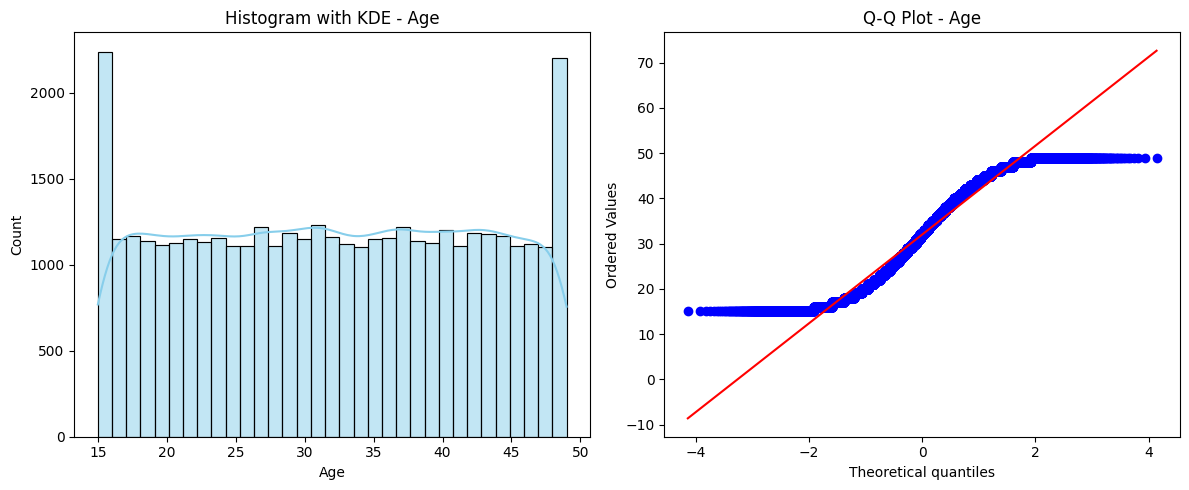

Age: Shapiro-Wilk p-value = 0.0000 → ❌ Not Gaussian



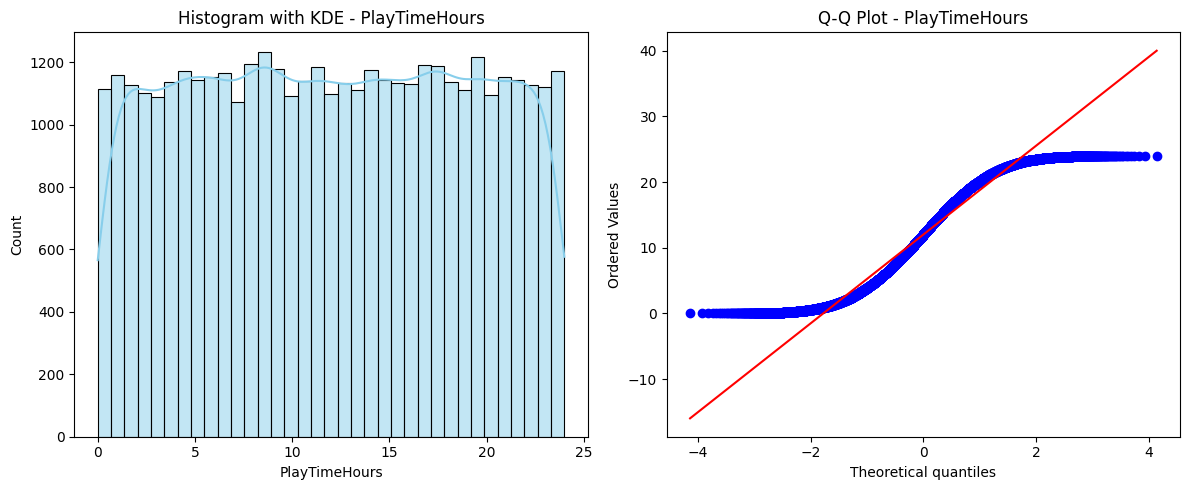

PlayTimeHours: Shapiro-Wilk p-value = 0.0000 → ❌ Not Gaussian



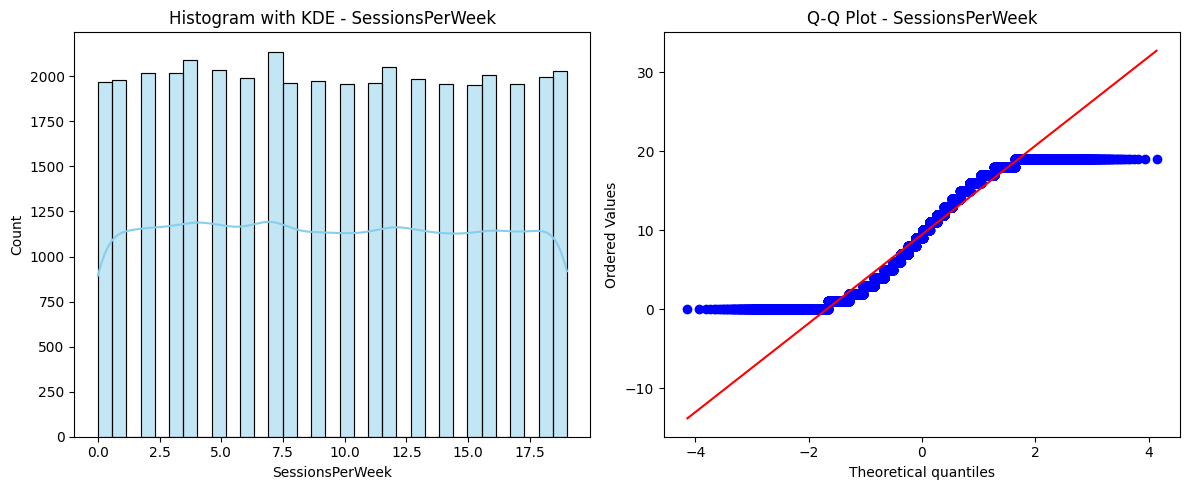

SessionsPerWeek: Shapiro-Wilk p-value = 0.0000 → ❌ Not Gaussian



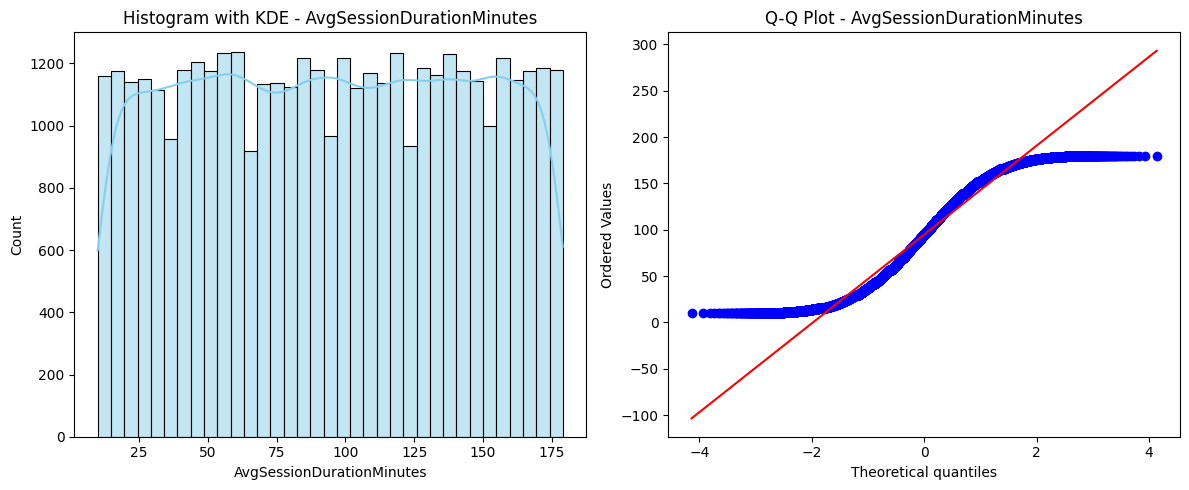

AvgSessionDurationMinutes: Shapiro-Wilk p-value = 0.0000 → ❌ Not Gaussian



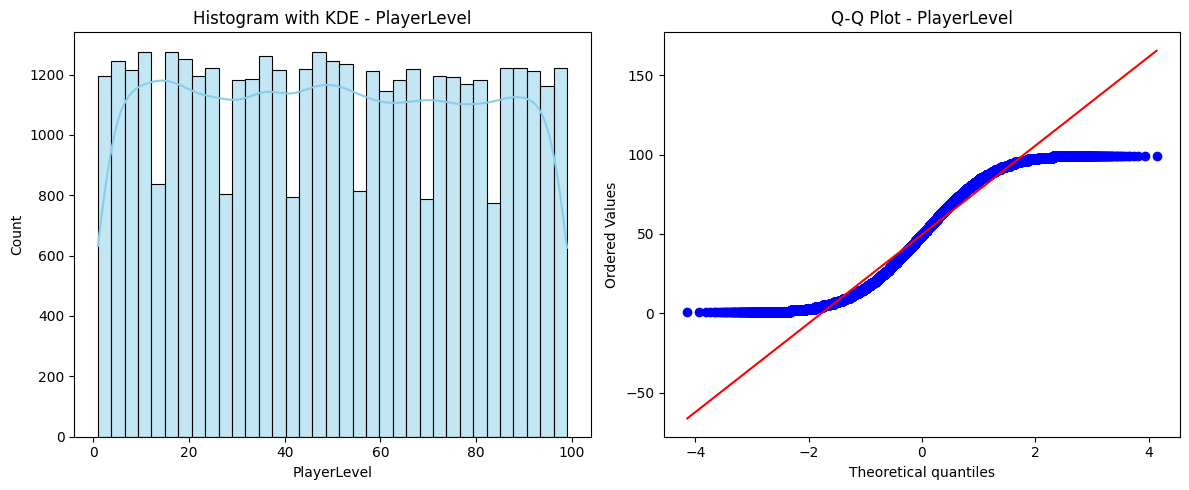

PlayerLevel: Shapiro-Wilk p-value = 0.0000 → ❌ Not Gaussian



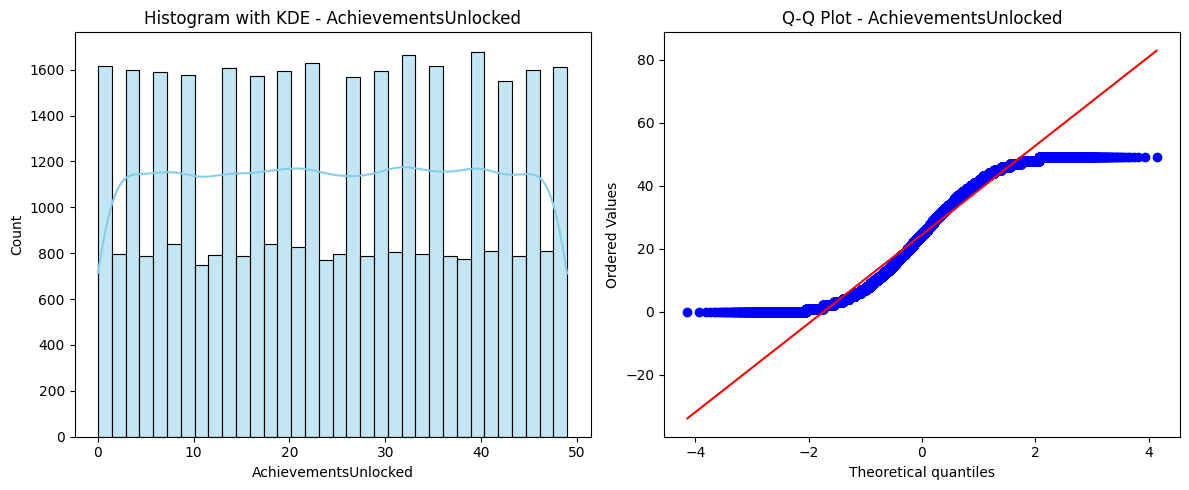

AchievementsUnlocked: Shapiro-Wilk p-value = 0.0000 → ❌ Not Gaussian



In [11]:
# 📊 Distribution Check for Numerical Features
numerical_cols = [
    'Age', 'PlayTimeHours', 'SessionsPerWeek', 
    'AvgSessionDurationMinutes', 'PlayerLevel', 'AchievementsUnlocked'
]

for col in numerical_cols:
    # Plot histogram with KDE
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True, color='skyblue')
    plt.title(f'Histogram with KDE - {col}')
    
    # Plot Q-Q plot
    plt.subplot(1, 2, 2)
    probplot(df[col], dist='norm', plot=plt)
    plt.title(f'Q-Q Plot - {col}')
    
    plt.tight_layout()
    plt.show()
    
    # Perform Shapiro-Wilk test
    stat, p = shapiro(df[col])
    result = "✅ Gaussian" if p > 0.05 else "❌ Not Gaussian"
    print(f"{col}: Shapiro-Wilk p-value = {p:.4f} → {result}\n")

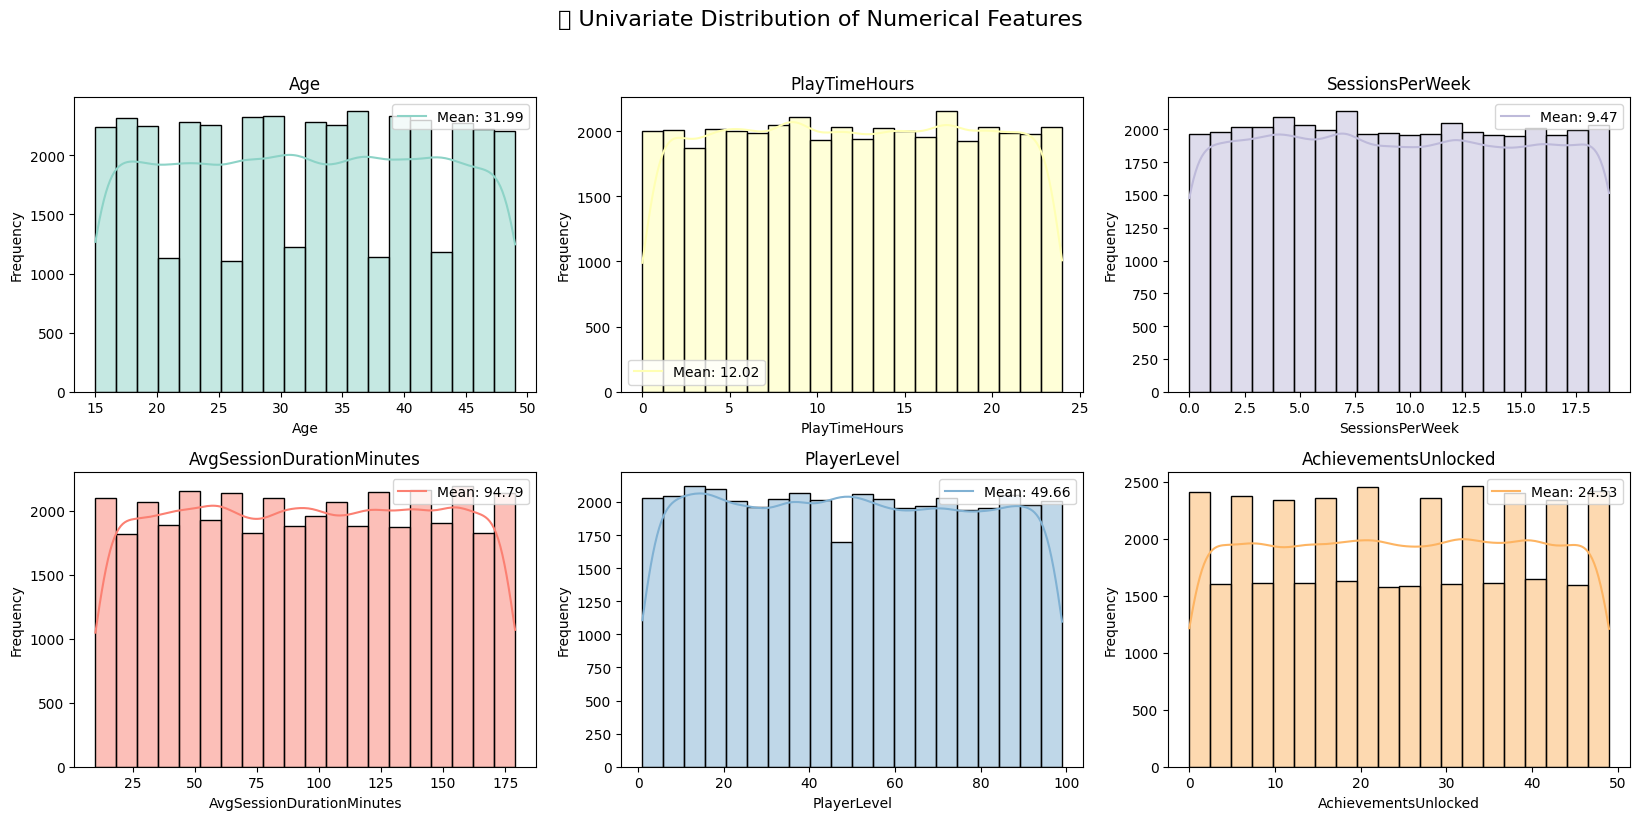

In [12]:
def plot_univariate_distributions(df, numeric_features):
    """
    Plots histograms with KDE overlays for each numerical feature.
    """
    num_features = len(numeric_features)
    num_cols = 3
    num_rows = (num_features + num_cols - 1) // num_cols  # automatic row count

    plt.figure(figsize=(num_cols * 5.5, num_rows * 4))
    color_palette = sns.color_palette("Set3", num_features)

    for idx, feature in enumerate(numeric_features):
        plt.subplot(num_rows, num_cols, idx + 1)
        sns.histplot(df[feature], kde=True, bins=20, color=color_palette[idx])
        plt.title(f'{feature.replace("_", " ")}', fontsize=12)
        plt.xlabel(feature.replace("_", " "))
        plt.ylabel('Frequency')
        plt.legend([f'Mean: {df[feature].mean():.2f}'])

    plt.suptitle("📊 Univariate Distribution of Numerical Features", fontsize=16, y=1.02)
    plt.tight_layout()
    plt.show()

plot_univariate_distributions(df, numerical_cols)

📋 Skewness and Kurtosis Summary:



,Feature,Skewness,Kurtosis
0,PlayerID,0.000000,-1.200000
1,Age,-0.004466,-1.192417
2,PlayTimeHours,-0.002225,-1.195706
3,InGamePurchases,1.493398,0.230249
4,SessionsPerWeek,0.015517,-1.206566
5,AvgSessionDurationMinutes,-0.005632,-1.199556
6,PlayerLevel,0.018754,-1.199738
7,AchievementsUnlocked,-0.005136,-1.199623


<Figure size 1400x600 with 0 Axes>

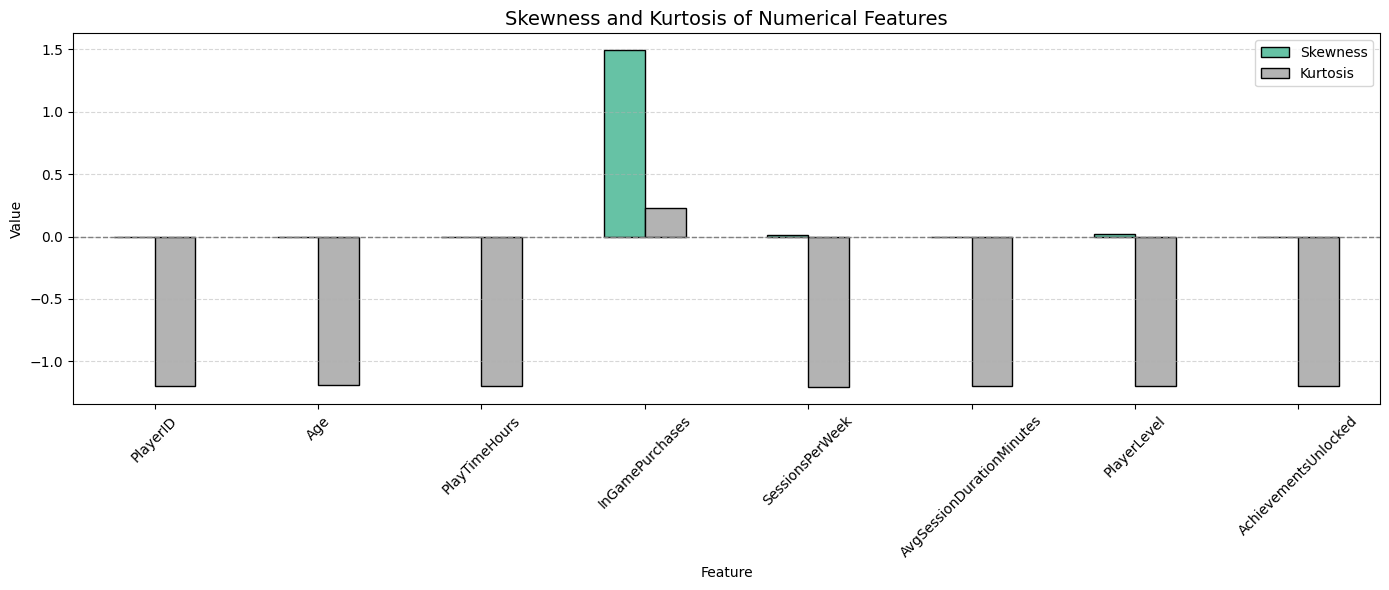

In [13]:
# 📊 Skewness and Kurtosis Analysis of Numerical Features

# Select numerical data
numerical_df = df.select_dtypes(include=[np.number])

# Compute skewness and kurtosis
skewness = numerical_df.skew()
kurtosis = numerical_df.kurt()

# Combine into a single DataFrame
distribution_stats = pd.DataFrame({
    'Feature': skewness.index,
    'Skewness': skewness.values,
    'Kurtosis': kurtosis.values
})

# Display the table
print("📋 Skewness and Kurtosis Summary:\n")
display(distribution_stats)

# Plot skewness and kurtosis
plt.figure(figsize=(14, 6))
distribution_stats.set_index('Feature')[['Skewness', 'Kurtosis']].plot(
    kind='bar', 
    figsize=(14, 6), 
    colormap='Set2', 
    edgecolor='black'
)

plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.title('Skewness and Kurtosis of Numerical Features', fontsize=14)
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.legend(loc='upper right')

plt.show()

### 📊 Distribution Analysis Summary & Feature Insights

Visual and statistical analysis confirms that the **numerical features do not follow a Gaussian (normal) distribution**:

- **Shapiro-Wilk p-values** for all tested features (`Age`, `PlayTimeHours`, `SessionsPerWeek`, `AvgSessionDurationMinutes`, `PlayerLevel`, `AchievementsUnlocked`) are **< 0.05**, providing strong evidence **against normality**.
- **Q-Q plots** further validate this by showing consistent deviations from the theoretical normal line.
- Most distributions are **uniform, skewed, or multimodal**, which aligns with expectations for behavioral data in gaming contexts.
- **Skewness and kurtosis values** for all features are close to 0 and well below kurtosis = 3, confirming that distributions are **not heavily tailed** and generally exhibit **low peakedness**.
- A notable exception is `InGamePurchases`, which shows **high right skew (1.49)**—**suggesting most players don't purchase, but a few outliers contribute significantly to in-game monetization**.

---

### 🔍 Feature-wise Insights

| Feature                   | Key Observations |
|--------------------------|------------------|
| **Age**                  | Near-zero skew (-0.00) and low kurtosis (-1.19); distribution is flat and slightly right-skewed. Majority aged 20–40, peaking at 25–30. |
| **PlayTimeHours**        | Very slight left skew (-0.00) and low kurtosis (-1.20); players typically log 10–15 hours per session. |
| **SessionsPerWeek**      | Almost symmetric (skew = 0.02), flat-tailed (-1.21); most players engage 5–10 times per week. |
| **AvgSessionDurationMinutes** | Near-normal appearance (skew = -0.01); centered around 90–100 mins with typical range of 50–150 mins. |
| **PlayerLevel**          | Symmetric (skew = 0.02) and flat (-1.20); uniformly distributed from levels 1–99, suggesting balanced progression. |
| **AchievementsUnlocked** | Slight left skew (-0.01) with low kurtosis (-1.20); most players unlock 15–30 achievements, few reach high totals. |
| **InGamePurchases**      | **Highly right-skewed (1.49)** and slightly peaked (0.23); suggests most players don’t purchase, but a few outliers contribute significantly to monetization. |

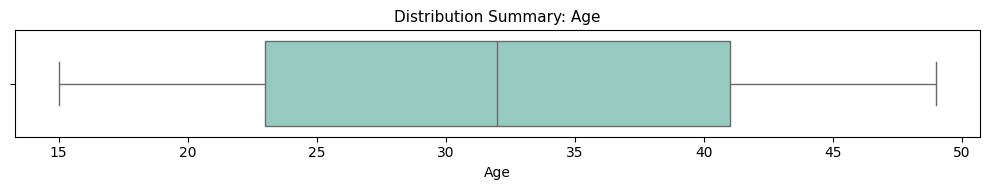

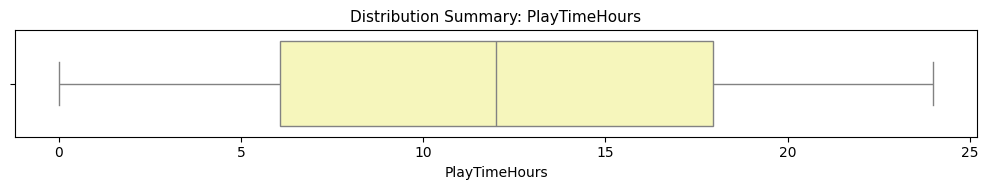

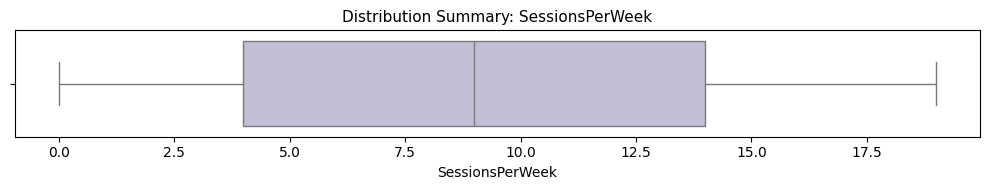

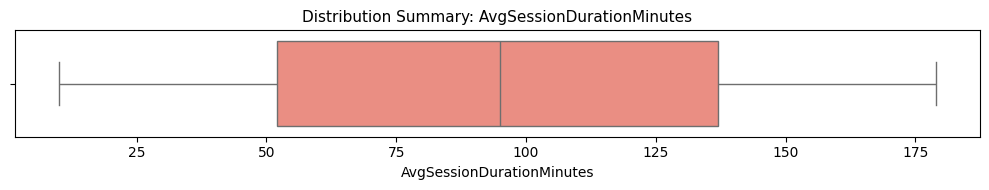

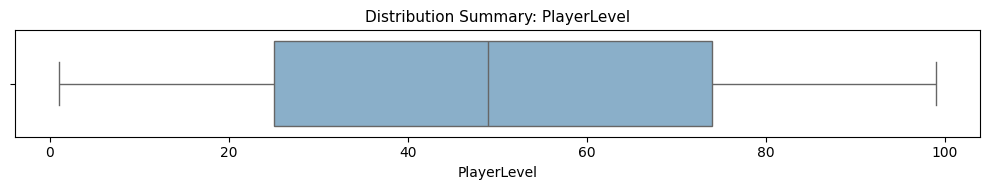

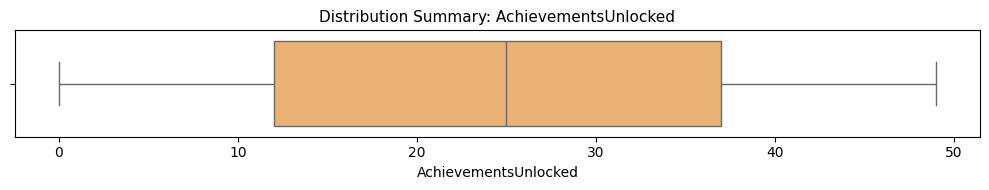

In [14]:
# Visual Exploration: Boxplots for Key Quantitative Features
# Horizontal boxplots for selected numeric attributes to visually examine value distribution and detect potential outliers.

# Function to draw a boxplot for each feature
def draw_feature_boxplot(dataframe, feature_name, display_name):
    plt.figure(figsize=(10, 2))
    
    # Choose a distinct color from the palette based on index
    color_choice = sns.color_palette("Set3")[numerical_cols.index(feature_name) % len(sns.color_palette("Set3"))]
    
    # Create the horizontal boxplot
    sns.boxplot(x=dataframe[feature_name], color=color_choice)
    plt.title(f'Distribution Summary: {display_name}', fontsize=11)
    plt.xlabel(display_name)
    
    plt.tight_layout()
    plt.show()

# Generate boxplots for each numerical column
for feature in numerical_cols:
    readable_label = feature.replace('_', ' ')
    draw_feature_boxplot(df, feature, readable_label)

### 🧠 Insights and Recommendations

#### 1. **Age**
- Average player age is around **32**, with a broad range from 15 to 49. This indicates a **mature and diverse player base**.

**Recommendations:**
- **Game Design**: Blend nostalgic and fast-paced elements to appeal across age groups.
- **Marketing**: Use generational targeting in ads (e.g., nostalgic references for older players, trend-driven content for younger ones).

---

#### 2. **PlayTimeHours**
- Average session time is **12 hours**, with some players showing minimal and others extensive engagement.

**Recommendations:**
- **Engagement Boosters**: Implement unlockable goals or streak-based rewards to lengthen playtime.
- **Reactivation**: Target low-time users with re-engagement campaigns like XP boosts or exclusive events.

---

#### 3. **InGamePurchases**
- Most users do **not** purchase, but a small group of players contributes **disproportionately** to revenue.

**Recommendations:**
- **Pricing Strategy**: Create multiple price tiers with diverse value propositions.
- **Conversion Tactics**: Highlight the benefits of premium content in a non-intrusive way (e.g., free trials, “try-before-you-buy” events).

---

#### 4. **SessionsPerWeek**
- Players average about **9 sessions weekly**, showing consistent re-engagement.

**Recommendations:**
- **Retention Mechanics**: Use login streaks and daily challenges to encourage consistent return.
- **Social Motivation**: Introduce cooperative or competitive features to drive habitual play.

---

#### 5. **AvgSessionDurationMinutes**
- Sessions average **95 minutes**, indicating strong content depth.

**Recommendations:**
- **Content Structure**: Offer both short-session modes and longer immersive missions to serve different play styles.
- **Optimize Onboarding**: Reduce early-game friction to ensure new users stay long enough to experience the core loop.

---

#### 6. **PlayerLevel**
- Players are spread fairly evenly across all levels, with an average near **50**.

**Recommendations:**
- **Progressive Rewards**: Offer milestone perks every 10–20 levels to keep advancement exciting.
- **Endgame Content**: Introduce elite-level features or prestige tiers for high-level players.

---

#### 7. **AchievementsUnlocked**
- On average, players unlock about **half of the available achievements**.

**Recommendations:**
- **Diverse Achievement Paths**: Include achievements for social play, exploration, and creativity.
- **Progress Visibility**: Show achievement progress bars or “near-complete” nudges to motivate completion.

---

### ✅ Strategic Summary

By combining behavioral metrics with thoughtful design, the following strategies can improve both experience and monetization:

- **Tailored Game Features**: Design flexible content paths for different engagement styles.
- **Smart Monetization**: Use behavioral segmentation to match pricing and value.
- **Player Retention**: Implement structured rewards, seasonal content, and meaningful progression systems.
ompleting achievement lists.

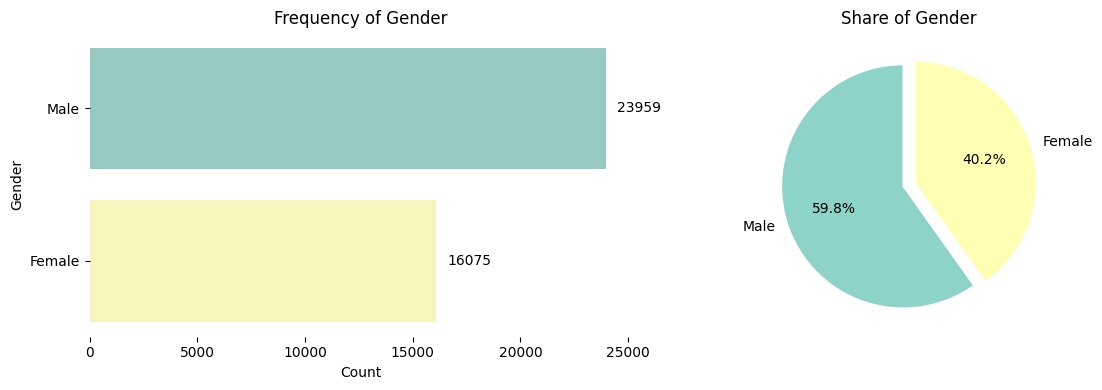

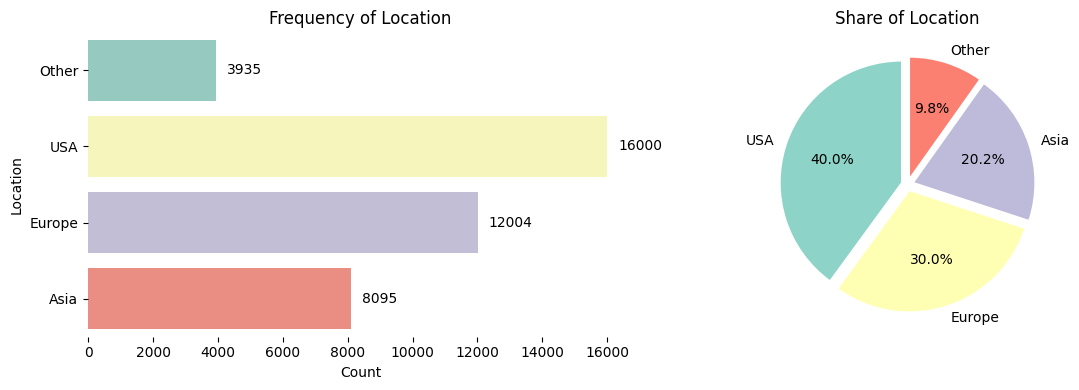

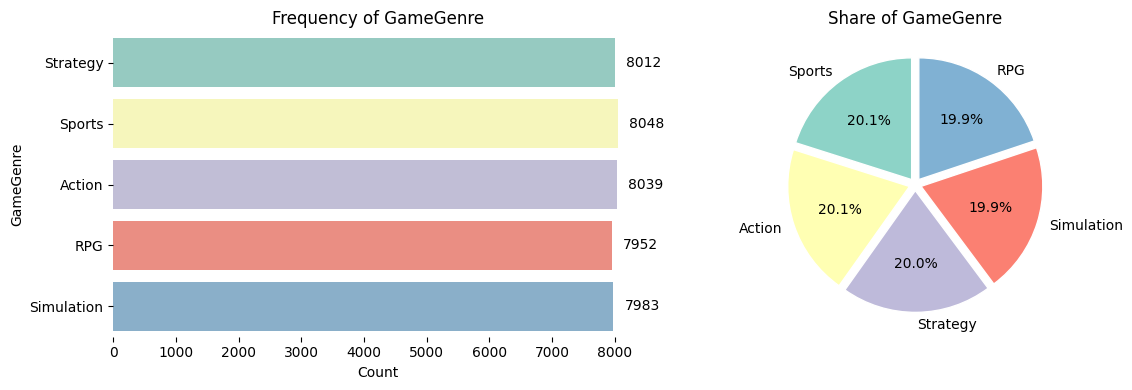

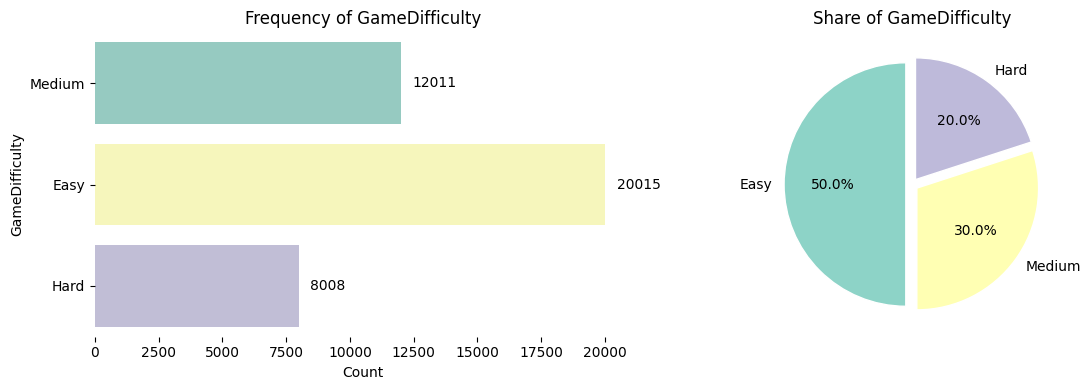

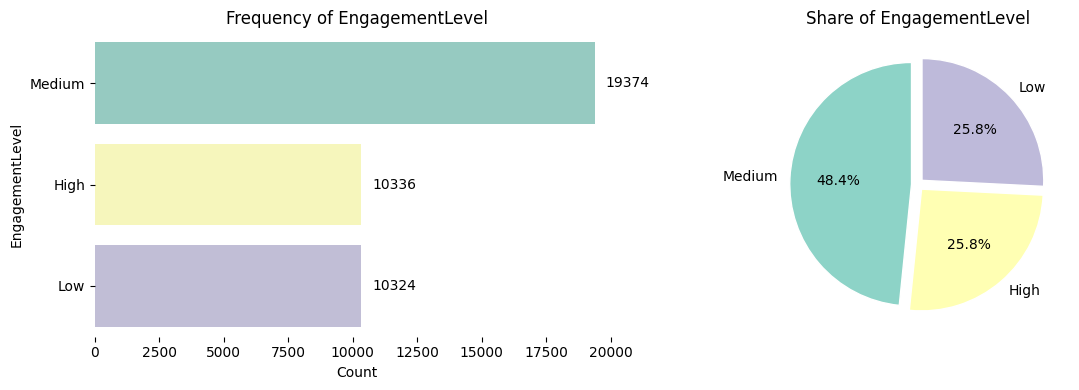

In [15]:
# 📊 Visualization: Distribution of Categorical Features

def visualize_category_distribution(feature, dataframe=df):
    plt.figure(figsize=(12, 4))
    
    # Bar Plot (Horizontal) – Frequency count
    plt.subplot(1, 2, 1)
    sns.countplot(y=feature, data=dataframe, palette='Set3')
    plt.title(f'Frequency of {feature}')
    plt.xlabel('Count')
    plt.ylabel(feature)
    
    # Annotate bar values
    ax = plt.gca()
    for bar in ax.patches:
        count = int(bar.get_width())
        ax.annotate(f'{count}', 
                    xy=(bar.get_width(), bar.get_y() + bar.get_height() / 2),
                    xytext=(8, 0), textcoords='offset points',
                    va='center', ha='left')
    
    sns.despine(left=True, bottom=True)

    # Pie Chart – Percentage share
    plt.subplot(1, 2, 2)
    dataframe[feature].value_counts().plot.pie(
        autopct='%1.1f%%',
        startangle=90,
        colors=sns.color_palette('Set3'),
        explode=[0.05] * dataframe[feature].nunique(),
        wedgeprops={'edgecolor': 'white'}
    )
    plt.title(f'Share of {feature}')
    plt.ylabel('')  # Remove default y-label for pie chart

    plt.tight_layout()
    plt.show()

# Plots for each categorical column
for col in categorical_features:
    visualize_category_distribution(col, df)

### 🎯 Insights from Categorical Features

#### 1. **Gender**
- The player base shows a clear majority of male participants, making up close to 60% of the total. This gender imbalance opens up opportunities to make the game more appealing to female players. Developers and marketers could introduce features like storylines with strong female leads, inclusive character customization, or community events that foster diversity and engagement among underrepresented groups.

#### 2. **Location**
- Players are predominantly based in the United States, with Europe and Asia following closely. This regional breakdown highlights the importance of tailoring experiences to specific geographic audiences. Localized content, cultural references, and region-specific promotions can help deepen user engagement and expand market reach across different areas.

#### 3. **Game Genre**
- Player preferences are distributed relatively evenly across genres, with a slight tilt toward Sports and Action titles. This diversity in interests suggests room for innovation through multi-genre or hybrid experiences. Game developers might consider blending mechanics (e.g., strategy in action games or RPG elements in sports titles) to appeal to overlapping player interests.

#### 4. **Game Difficulty**
- Half of the player population favors easier gameplay, reflecting a strong presence of casual gamers. To cater to this broad range of skill levels, developers should provide flexible difficulty settings, onboarding tutorials, and optional challenges. This allows newcomers to enjoy the experience while still delivering depth and difficulty for more competitive players.

---
<h3 align="center">Target Variable Analysis</h3>

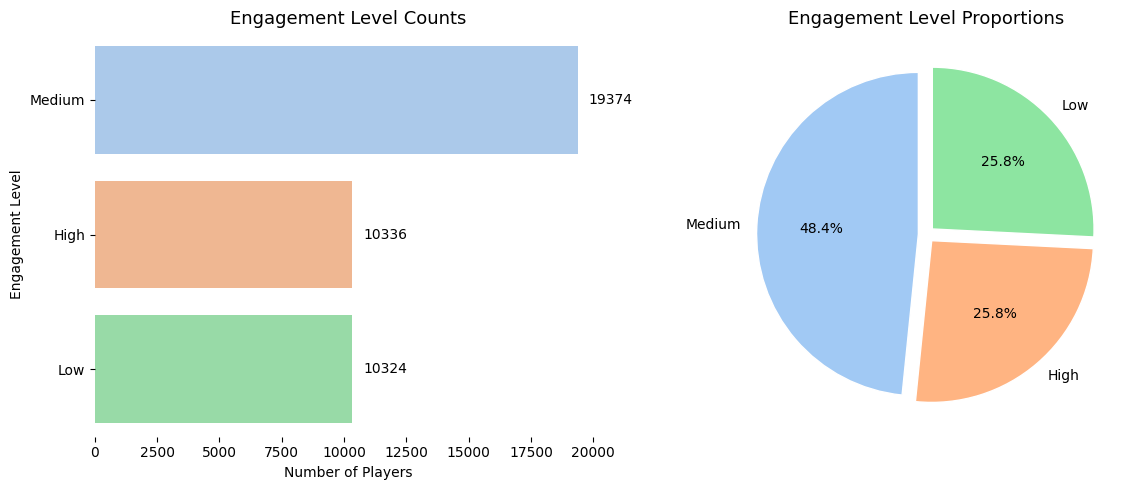

In [16]:
# 📊 Engagement Level Distribution Analysis
'''This visualization block compares the distribution of the target variable `EngagementLevel` '''

target_feature = 'EngagementLevel'
plot_colors = sns.color_palette('pastel')  # Updated for a softer palette

plt.figure(figsize=(12, 5))

# Subplot 1: Horizontal Count Plot
plt.subplot(1, 2, 1)
sns.countplot(y=target_feature, data=df, palette=plot_colors)
plt.title('Engagement Level Counts', fontsize=13)
plt.xlabel('Number of Players')
plt.ylabel('Engagement Level')

# Annotate counts next to bars
ax = plt.gca()
for bar in ax.patches:
    count = int(bar.get_width())
    ax.annotate(f'{count}', 
                xy=(bar.get_width(), bar.get_y() + bar.get_height() / 2),
                xytext=(8, 0), textcoords='offset points',
                va='center', ha='left', fontsize=10)

sns.despine(left=True, bottom=True)

# Subplot 2: Pie Chart of Class Proportions
plt.subplot(1, 2, 2)
df[target_feature].value_counts().plot.pie(
    autopct='%1.1f%%',
    startangle=90,
    colors=plot_colors,
    explode=[0.05] * df[target_feature].nunique(),
    wedgeprops={'linewidth': 1, 'edgecolor': 'white'}
)
plt.title('Engagement Level Proportions', fontsize=13)
plt.ylabel('')  # Remove default ylabel

plt.tight_layout()
plt.show()


📋 Summary Statistics for 'Age' by Engagement Level:
                      mean  median  count
EngagementLevel                          
High             31.920085    32.0  10336
Low              31.896939    32.0  10324
Medium           32.082120    32.0  19374

📋 Summary Statistics for 'PlayTimeHours' by Engagement Level:
                      mean     median  count
EngagementLevel                             
High             12.069238  11.981024  10336
Low              12.104915  12.074409  10324
Medium           11.957503  11.992280  19374

📋 Summary Statistics for 'SessionsPerWeek' by Engagement Level:
                      mean  median  count
EngagementLevel                          
High             14.254547    15.0  10336
Low               4.530511     3.0  10324
Medium            9.553267     9.0  19374

📋 Summary Statistics for 'AvgSessionDurationMinutes' by Engagement Level:
                       mean  median  count
EngagementLevel                           
High         

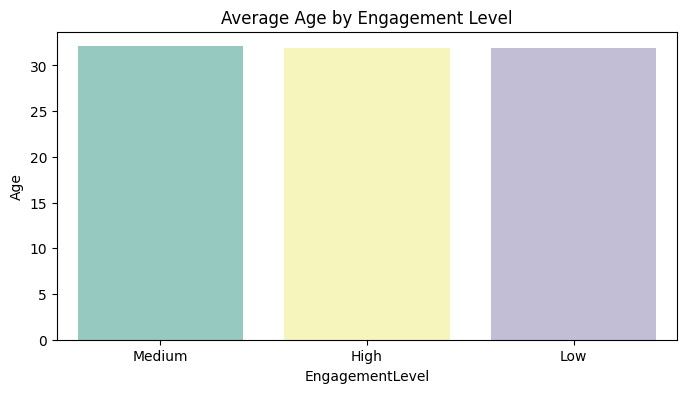

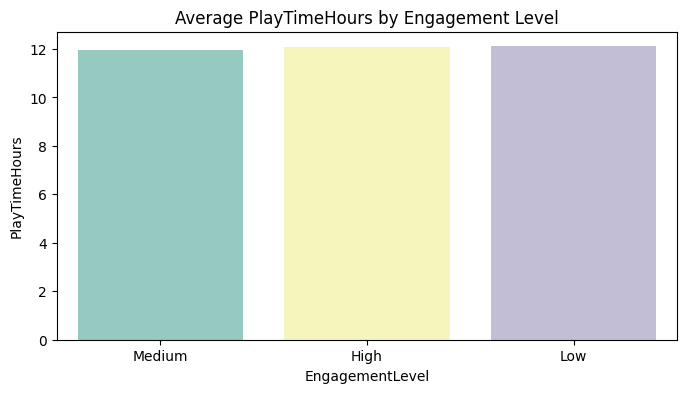

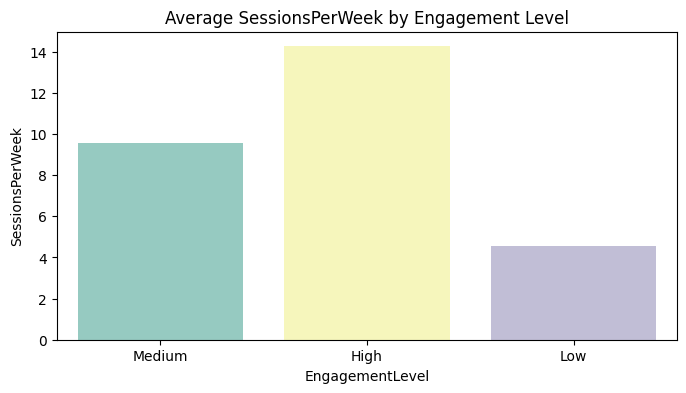

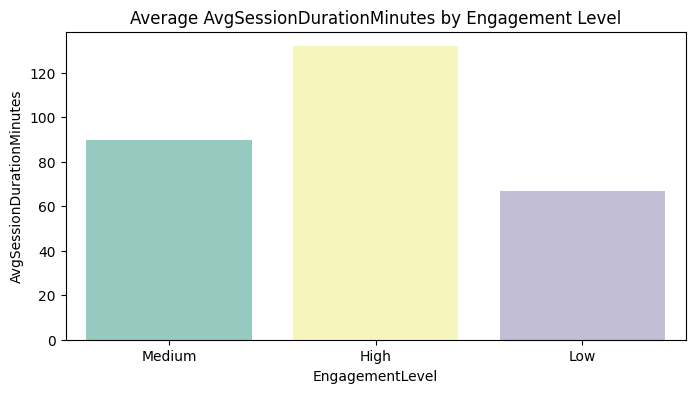

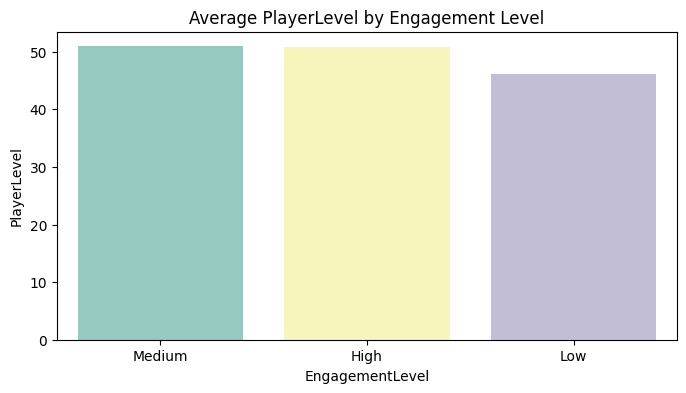

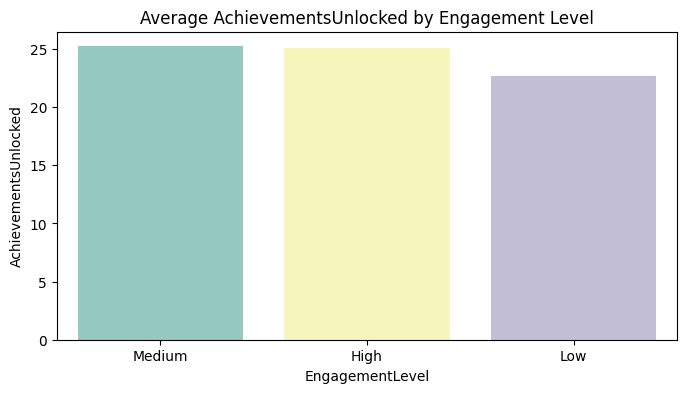

In [17]:
# 📊 Comparative Analysis: Numeric Feature Trends by Engagement Level

# Loop through each feature for grouped statistics and bar plot
for feature in numerical_cols:
    # Compute mean, median, and count by Engagement Level
    grouped_stats = df.groupby('EngagementLevel')[feature].agg(['mean', 'median', 'count'])
    
    # Display computed statistics
    print(f"\n📋 Summary Statistics for '{feature}' by Engagement Level:")
    print(grouped_stats)
    
    # Bar plot: mean value of the feature across engagement levels
    plt.figure(figsize=(8, 4))
    sns.barplot(data=df, x='EngagementLevel', y=feature, ci=None, palette='Set3')
    
    # Add custom titles and labels
    plt.title(f'Average {feature.replace("_", " ")} by Engagement Level', fontsize=12)
    plt.xlabel


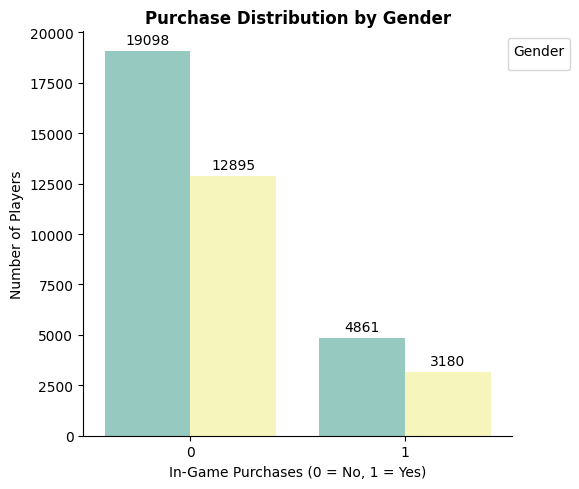

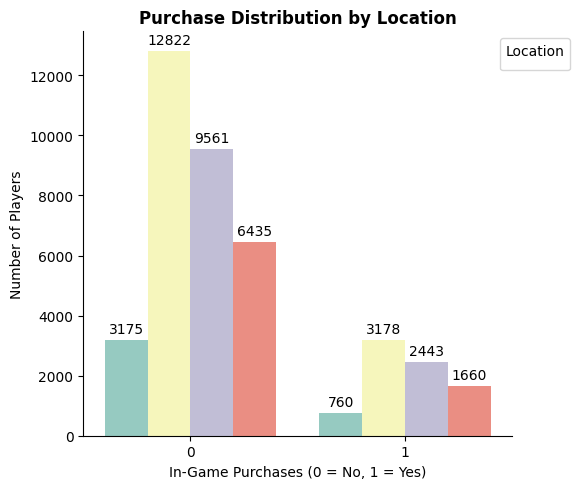

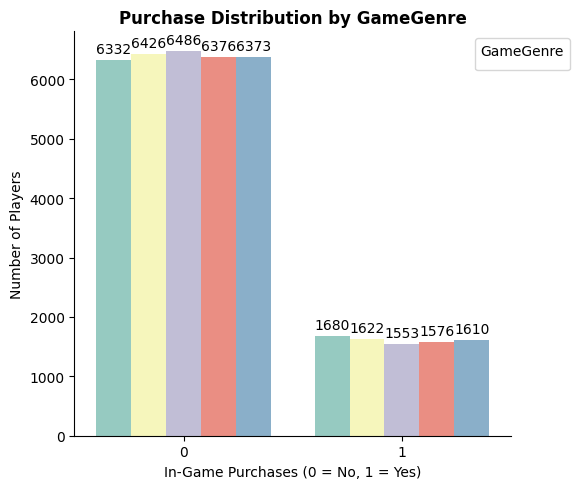

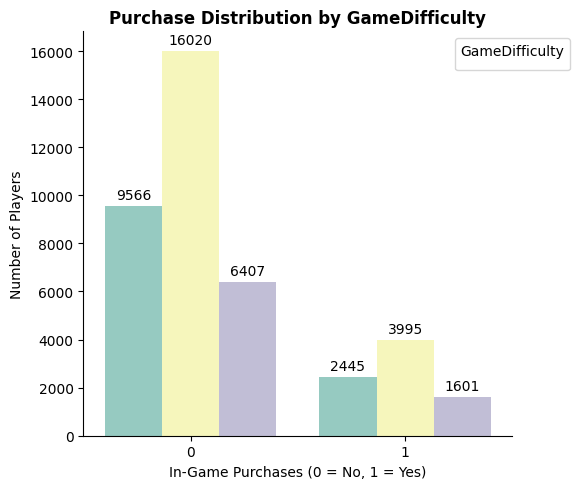

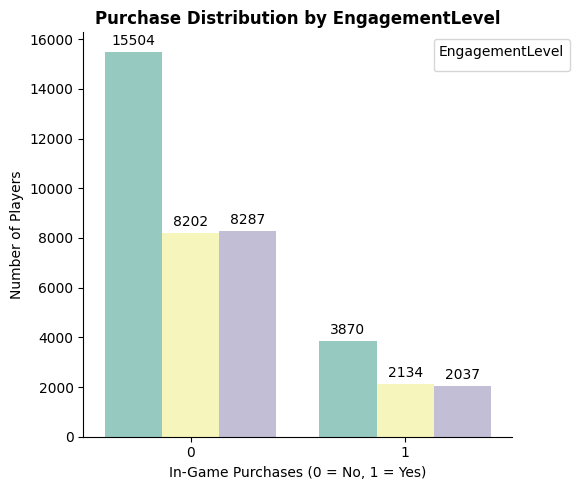

In [18]:
# 🛒 In-Game Purchase Behavior Across Categorical Segments

# Loop through each categorical feature to create annotated catplots
for feature in categorical_features:
    # Create count plot comparing InGamePurchases across current feature
    plot = sns.catplot(
        data=df,
        x='InGamePurchases',
        hue=feature,
        kind='count',
        height=5,
        aspect=1.2,
        palette='Set3',
        legend=False  # Custom legend placement
    )
    
    # Set axis labels and title
    plot.set_axis_labels("In-Game Purchases (0 = No, 1 = Yes)", "Number of Players")
    plt.title(f'Purchase Distribution by {feature}', weight='bold')

    # Annotate bar values with count labels
    for ax in plot.axes.flat:
        for bar in ax.patches:
            ax.annotate(f'{int(bar.get_height())}',
                        (bar.get_x() + bar.get_width() / 2., bar.get_height()),
                        ha='center', va='baseline',
                        fontsize=10, color='black',
                        xytext=(0, 5), textcoords='offset points')
    
    # Adjust legend location outside the plot
    plt.legend(
        title=feature,
        loc='upper right',
        bbox_to_anchor=(1.15, 1)
    )
    
    plt.tight_layout()
    plt.show()

## 📊 Player Behavior Insights

### 🧑‍🤝‍🧑 Demographics & Play Patterns

- **Age**: Consistent across all engagement levels, indicating it's not a key driver of engagement.
  - 🔁 *Recommendation*: Prioritize behavioral traits over demographics for engagement strategies.

- **PlayTimeHours**: Surprisingly, highly engaged users play slightly fewer hours. Possibly due to more focused or efficient play sessions.
  - 🔁 *Recommendation*: Explore session quality—offer bite-sized challenges or time-limited events.

- **SessionsPerWeek & AvgSessionDuration**: Strong positive link with engagement. More engaged players log in more often and play longer per session.
  - 🔁 *Recommendation*: Introduce login rewards, streak bonuses, and immersive content to lengthen playtime.

- **PlayerLevel & AchievementsUnlocked**: High and medium engagement users show more progression and unlocked achievements compared to low-engagement users.
  - 🔁 *Recommendation*: Create motivational systems for lower-engagement players like milestone badges or guided missions.

---

## 🛒 In-Game Purchase Patterns

| **Category**        | **Highest Purchase Rate** | **Key Insight**                                                                 |
|---------------------|---------------------------|----------------------------------------------------------------------------------|
| **Gender**          | Male (20.3%)              | Minimal gender gap; majority of players don't purchase.                         |
| **Location**        | Asia (20.5%)              | Despite fewer players, Asia leads in conversion rate.                            |
| **Game Genre**      | Strategy (21.0%)          | Players in strategy games spend more; Action genre lags slightly.               |
| **Game Difficulty** | Medium (20.4%)            | Balanced difficulty seems to drive more purchases.                              |
| **Engagement Level**| High (20.6%)              | Direct correlation between engagement and spending observed.                    |

### 🎯 Recommendations:

- **Gender Targeting**: Develop tailored campaigns (e.g., female-centric cosmetics or avatars) to improve conversion among underrepresented segments.
- **Region-Specific Promotions**: Optimize pricing, event timing, and themes based on region-specific behavior (e.g., boost U.S. purchase rate).
- **Genre-Specific Monetization**: Incentivize Action game purchases through time-limited bundles, while expanding Strategy game content.
- **Difficulty Adjustments**: Offer bonus items or incentives to Easy-mode players to nudge spending without compromising game balance.
- **Engagement-Based Offers**: Push exclusive offers to medium-engagement users to move them into the high-spending tier.

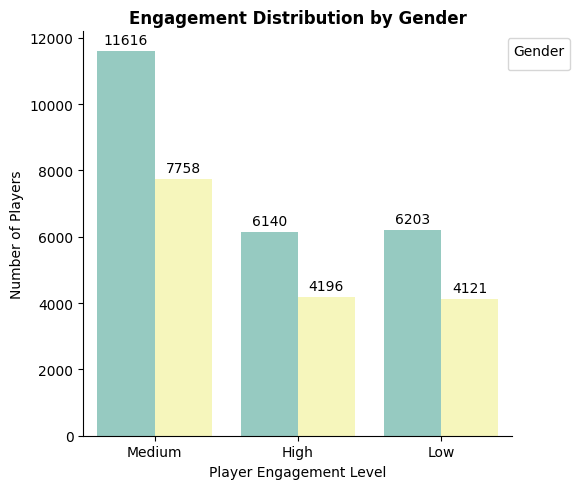

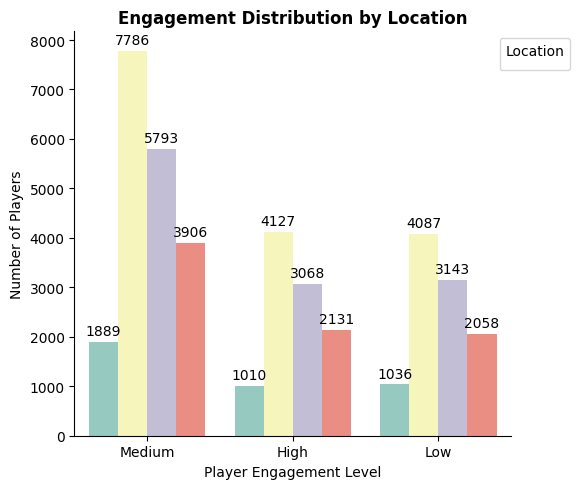

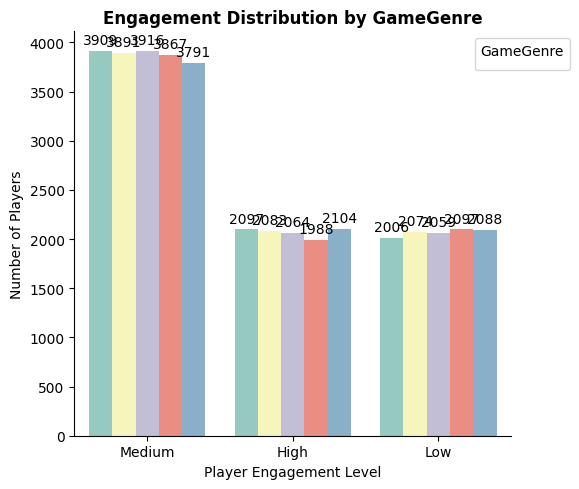

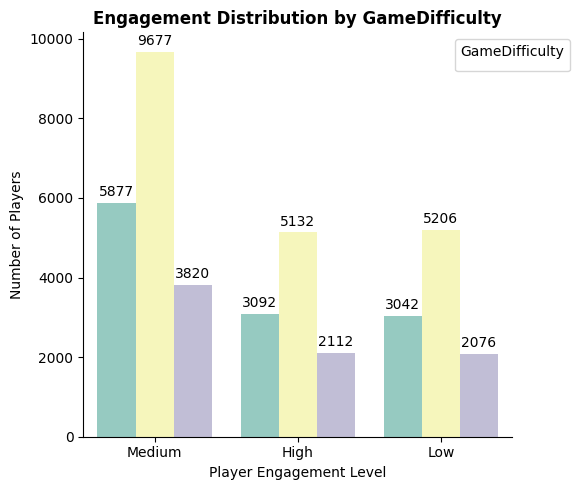

In [19]:
# 🧠 Engagement Level Analysis by Categorical Segments

# Categorical variables to analyze engagement variation
engagement_features = ['Gender', 'Location', 'GameGenre', 'GameDifficulty']

# Iterate over each feature to generate comparative count plots
for feature in engagement_features:
    # Generate count plot grouped by Engagement Level and colored by feature category
    plot = sns.catplot(
        data=df,
        x='EngagementLevel',
        hue=feature,
        kind='count',
        height=5,
        aspect=1.2,
        palette='Set3',
        legend=False
    )
    
    # Customize axis labels and plot title
    plot.set_axis_labels("Player Engagement Level", "Number of Players")
    plt.title(f'Engagement Distribution by {feature}', weight='bold')

    # Annotate bars with actual count values
    for ax in plot.axes.flat:
        for bar in ax.patches:
            ax.annotate(f'{int(bar.get_height())}',
                        (bar.get_x() + bar.get_width() / 2., bar.get_height()),
                        ha='center', va='baseline',
                        fontsize=10, color='black',
                        xytext=(0, 5), textcoords='offset points')
    
    # Adjust legend placement outside the plot for clarity
    plt.legend(
        title=feature,
        loc='upper right',
        bbox_to_anchor=(1.15, 1)
    )
    
    plt.tight_layout()
    plt.show()


### 🎮 Engagement Patterns by Player Segments

### 👥 Gender
| Gender | High (%) | Low (%) | Medium (%) |
|--------|----------|---------|-------------|
| Female | 26.1     | 25.6    | 48.3        |
| Male   | 25.6     | 25.9    | 48.5        |

- **Insight**: Medium engagement is dominant for both. Female players show slightly lower high/low engagement.
- **Tip**: Introduce inclusive features and community events to boost female participation at higher engagement levels.

### 🌍 Location
| Region | High (%) | Low (%) | Medium (%) |
|--------|----------|---------|-------------|
| Asia   | 26.3     | 25.4    | 48.3        |
| USA    | 25.8     | 25.5    | 48.7        |
| Europe | 25.6     | 26.2    | 48.3        |
| Other  | 25.7     | 26.3    | 48.0        |

- **Insight**: Asia has the highest high-engagement share; USA leads in overall players.
- **Tip**: Leverage Asia’s high engagement with exclusive content; tailor regional promos for Europe and Other to boost loyalty.

### 🕹 Game Genre
| Genre      | High (%) | Low (%) | Medium (%) |
|------------|----------|---------|-------------|
| Strategy   | 26.2     | 25.0    | 48.8        |
| RPG        | 25.0     | 26.4    | 48.6        |
| Simulation | 26.4     | 26.2    | 47.5        |

- **Insight**: Strategy games drive the highest engagement; RPGs lag with higher low-engagement rates.
- **Tip**: Refine RPG elements to improve retention; replicate successful features from Strategy games across other genres.

### 🎯 Game Difficulty
| Difficulty | High (%) | Low (%) | Medium (%) |
|------------|----------|---------|-------------|
| Hard       | 26.4     | 25.9    | 47.7        |
| Medium     | 25.7     | 25.3    | 48.9        |
| Easy       | 25.6     | 26.0    | 48.4        |

- **Insight**: Hard mode players are most engaged; medium difficulty sees highest medium-level engagement.
- **Tip**: Offer exclusive rewards in Hard mode to encourage retention; gently guide Easy mode players to progress further.
sive incentives to encourage players to increase their engagement.

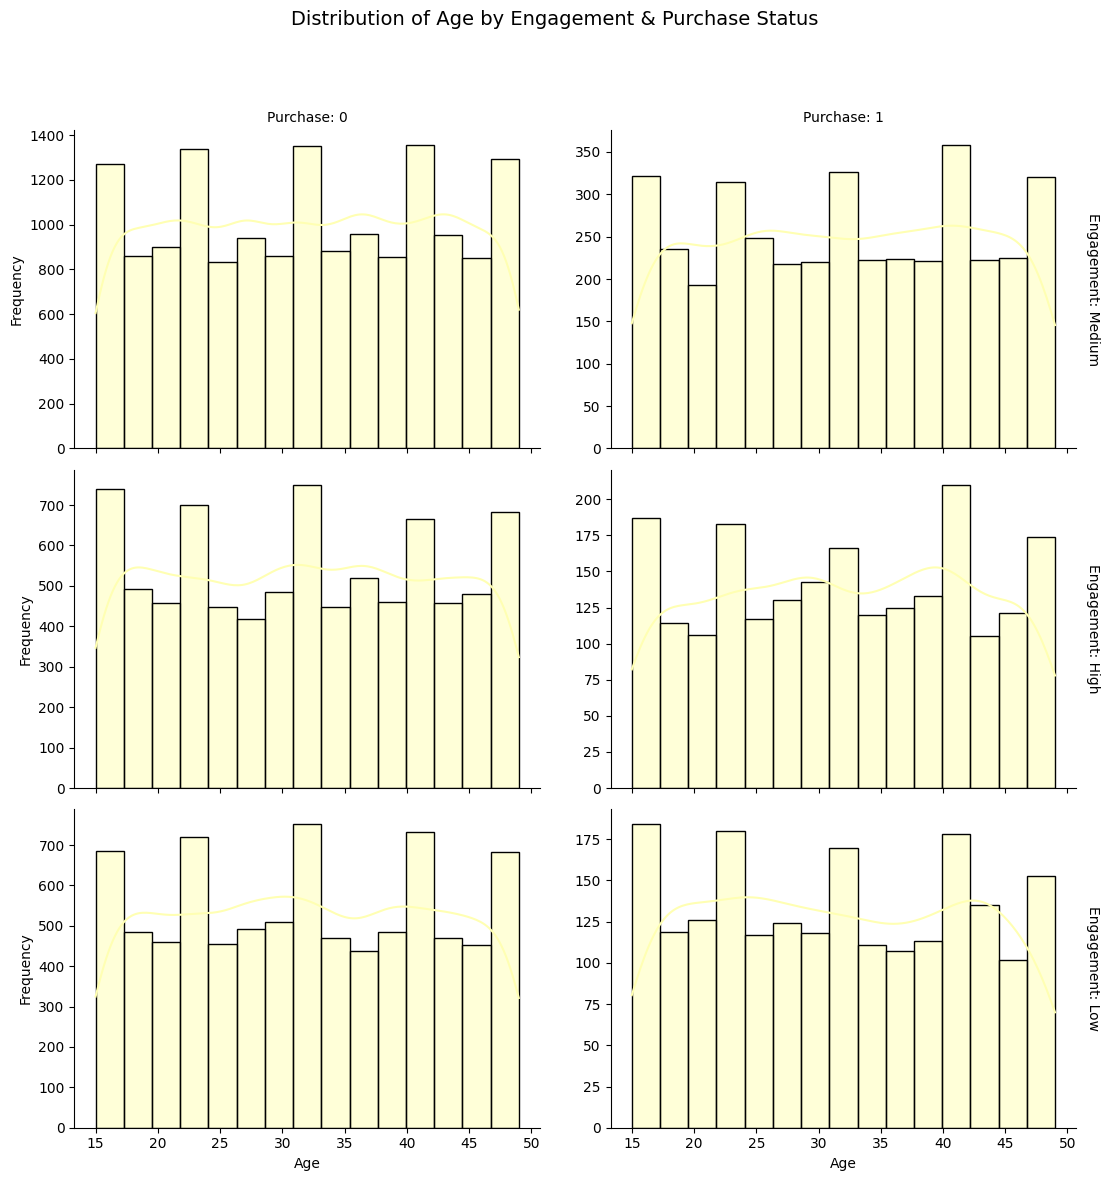

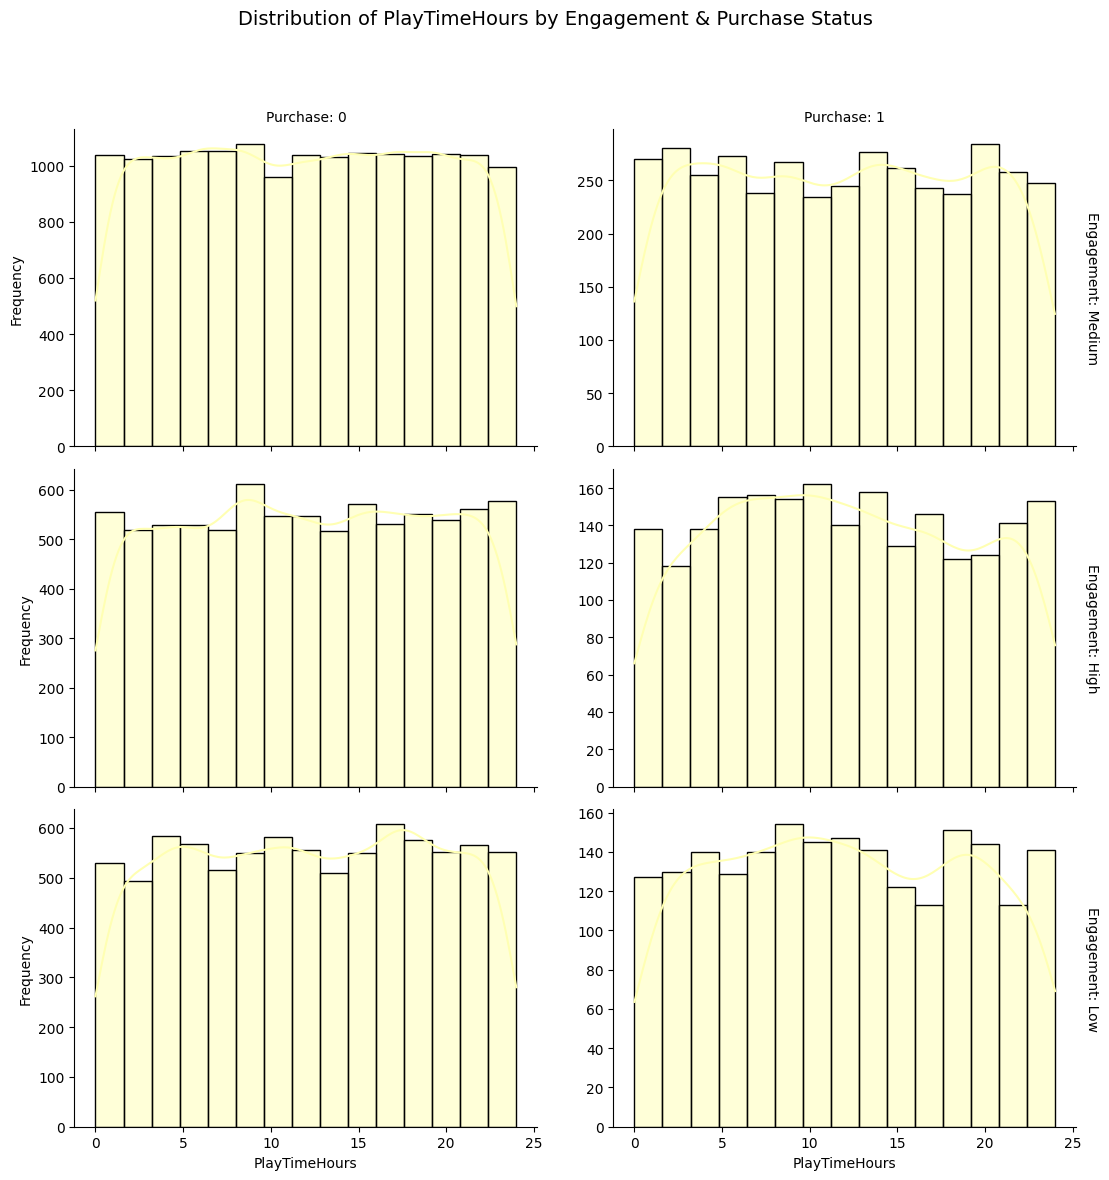

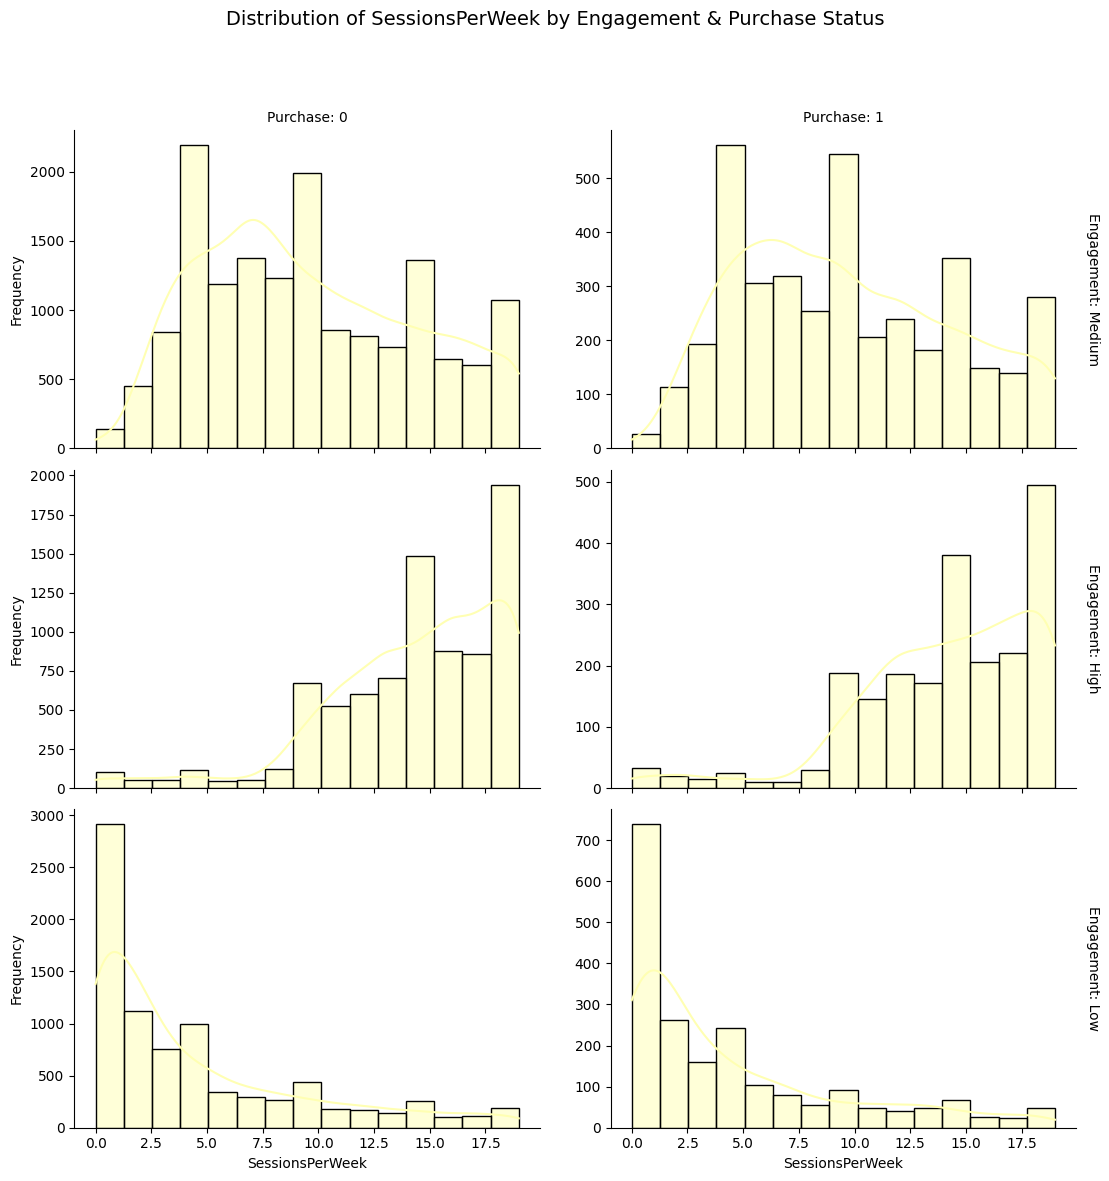

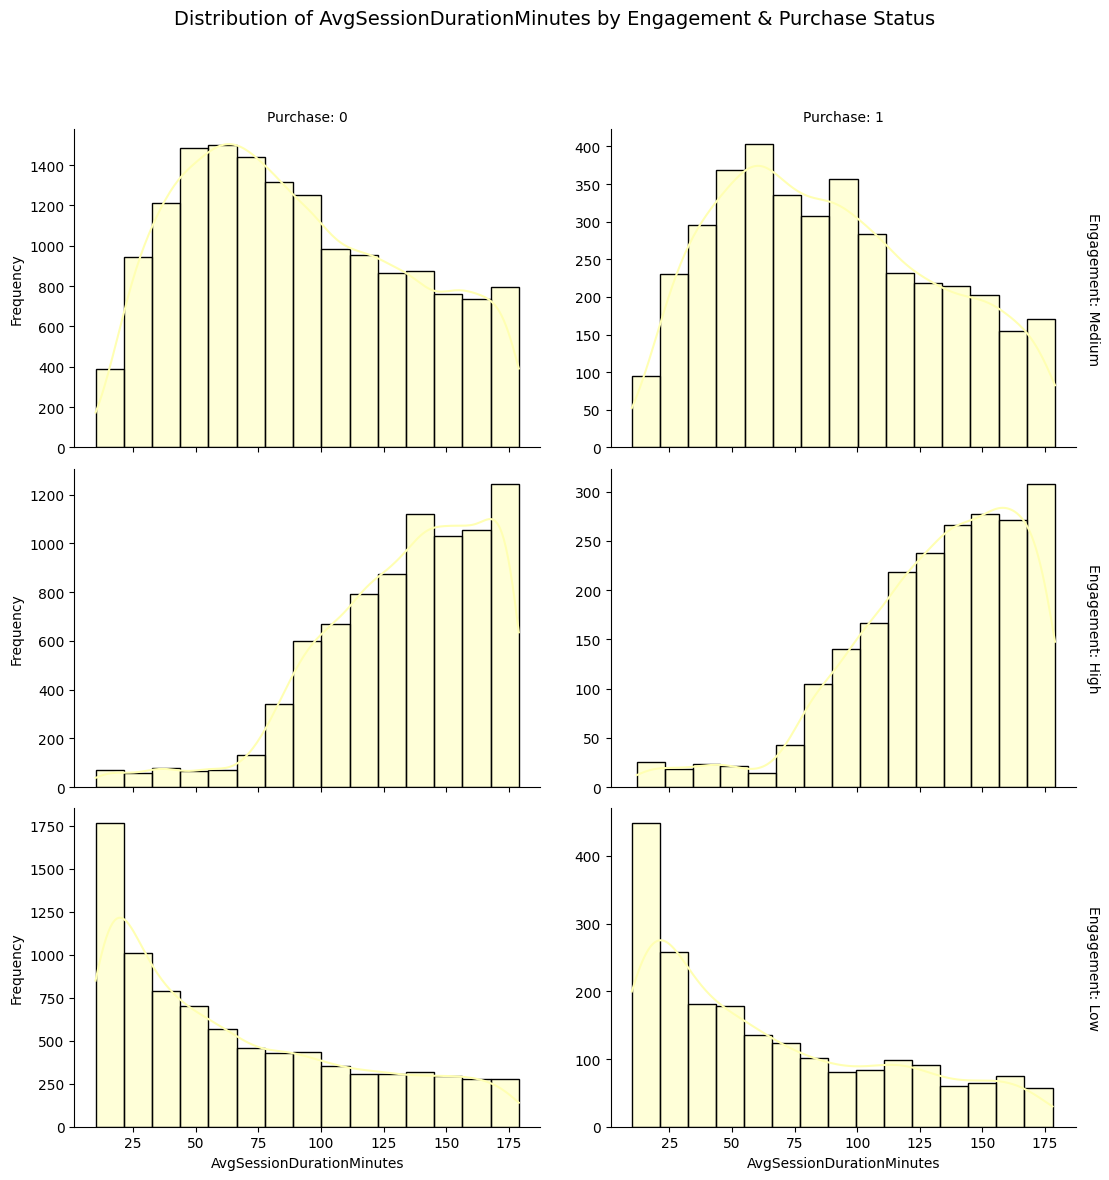

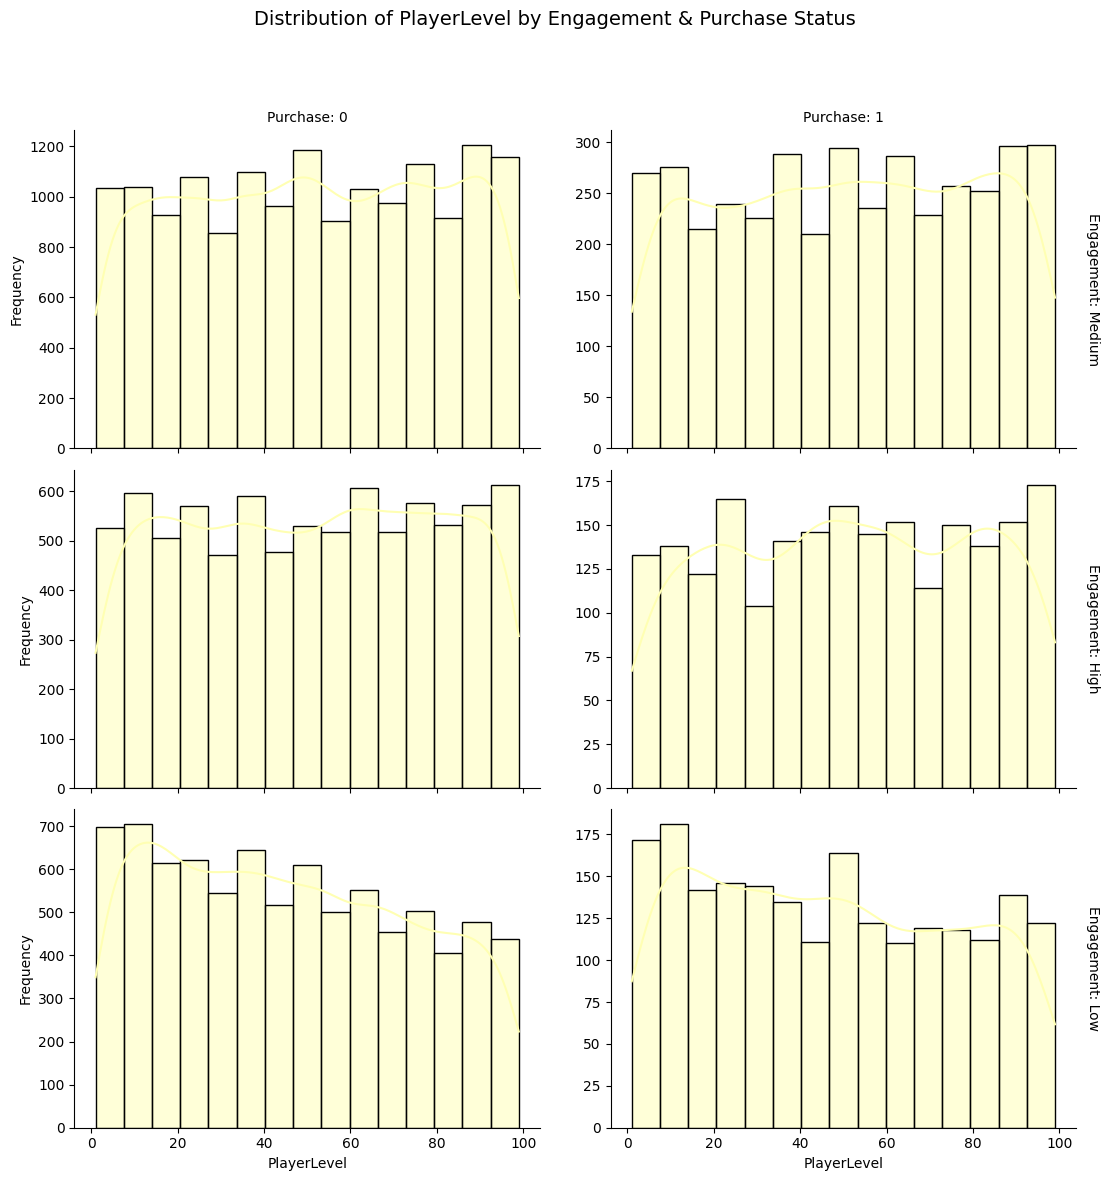

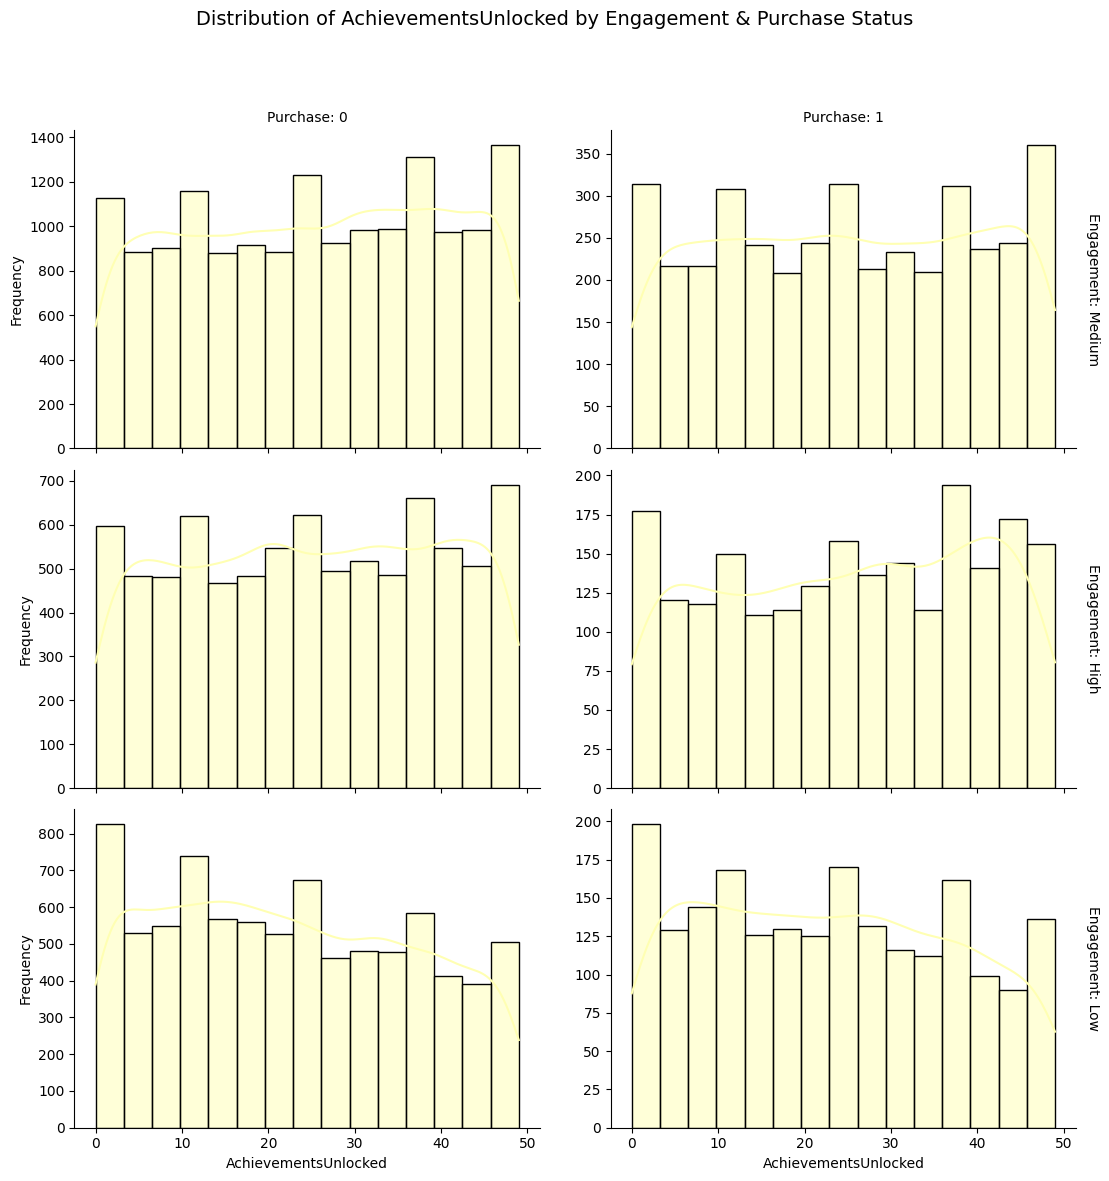

In [20]:
# Define the numerical features to plot against InGamePurchases by EngagementLevel

for metric in numerical_cols:
    g = sns.FacetGrid(
        df,
        row='EngagementLevel',
        col='InGamePurchases',
        margin_titles=True,
        height=4,
        aspect=1.4,
        sharex=True,
        sharey=False
    )

    g.map(
        sns.histplot,
        metric,
        kde=True,
        bins=15,
        color=sns.color_palette("Set3")[1]
    )

    g.set_axis_labels(x_var=metric.replace('_', ' '), y_var='Frequency')
    g.set_titles(row_template='Engagement: {row_name}', col_template='Purchase: {col_name}')
    g.fig.subplots_adjust(top=0.88)
    g.fig.suptitle(
        f'Distribution of {metric.replace("_", " ")} by Engagement & Purchase Status',
        fontsize=14
    )

    plt.show()


### **Key Insights**

- **Age**: Most players are between 20–40 across all groups; age has minimal influence on engagement or purchases.

- **Play Time**: Purchasers and highly engaged users play more. Playtime rises with both engagement and spending.

- **Sessions per Week**: Frequent sessions (10–15/week) are common among purchasers and high-engagement players. It’s a strong signal for spending.

- **Session Duration**: Purchasers, especially those highly engaged, spend longer per session. Longer sessions reflect deeper involvement.

- **Player Level**: Higher levels are linked to purchases. Non-purchasers are clustered at lower levels.

- **Achievements**: More achievements unlocked = more likely to purchase. High engagement + high achievements often go hand-in-hand.
ement and potential spending.


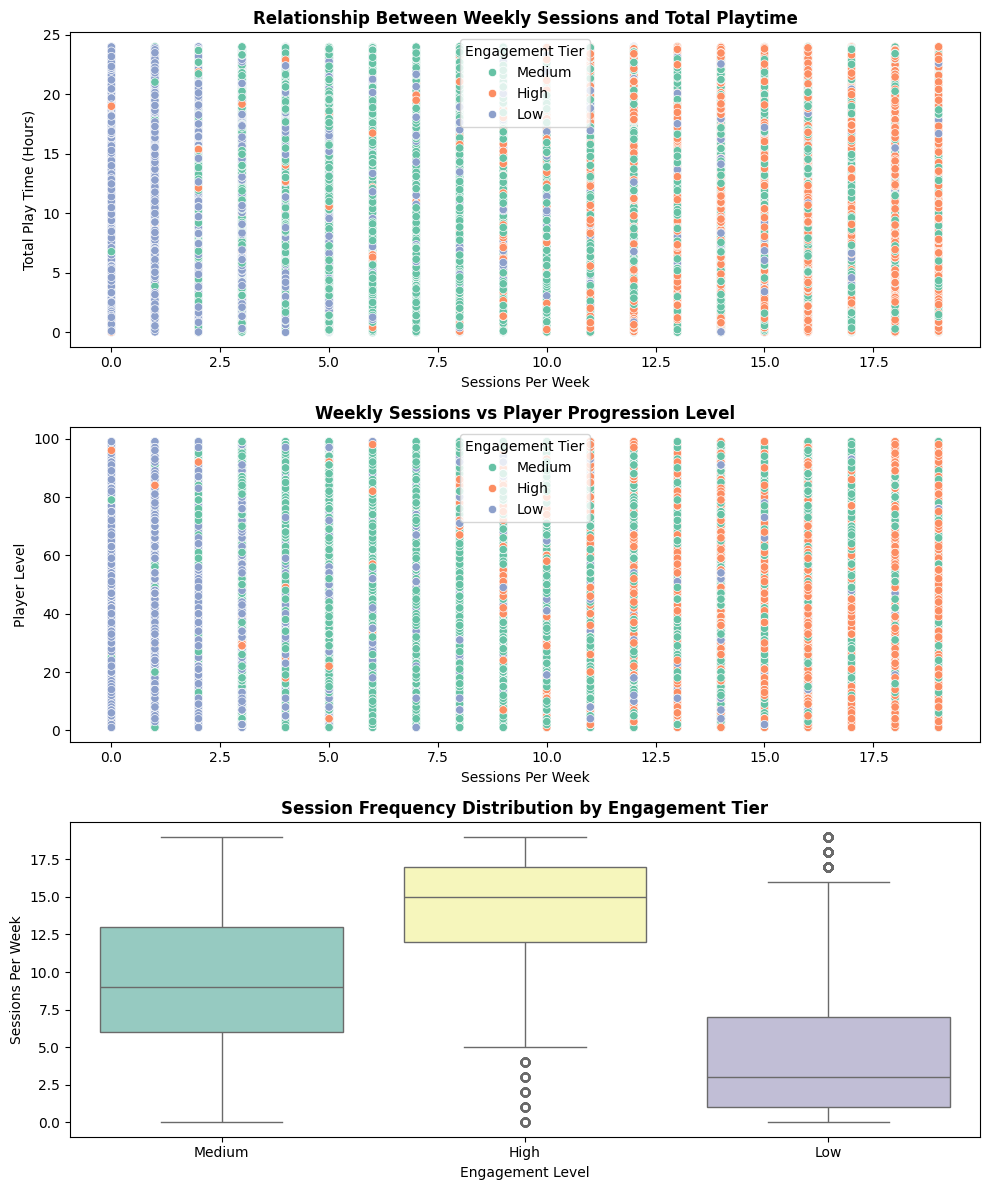

In [21]:
# Visualize how weekly gaming frequency relates to total playtime, player level, and engagement classification
plt.figure(figsize=(10, 12))

# Plot 1: Weekly sessions vs total playtime by engagement
plt.subplot(3, 1, 1)
sns.scatterplot(
    data=df,
    x='SessionsPerWeek',
    y='PlayTimeHours',
    hue='EngagementLevel',
    palette='Set2'
)
plt.title("Relationship Between Weekly Sessions and Total Playtime", weight='bold')
plt.xlabel("Sessions Per Week")
plt.ylabel("Total Play Time (Hours)")
plt.legend(title='Engagement Tier')

# Plot 2: Weekly sessions vs player level by engagement
plt.subplot(3, 1, 2)
sns.scatterplot(
    data=df,
    x='SessionsPerWeek',
    y='PlayerLevel',
    hue='EngagementLevel',
    palette='Set2'
)
plt.title("Weekly Sessions vs Player Progression Level", weight='bold')
plt.xlabel("Sessions Per Week")
plt.ylabel("Player Level")
plt.legend(title='Engagement Tier')

# Plot 3: Distribution of weekly sessions across engagement levels
plt.subplot(3, 1, 3)
sns.boxplot(
    data=df,
    x='EngagementLevel',
    y='SessionsPerWeek',
    palette='Set3'
)
plt.title("Session Frequency Distribution by Engagement Tier", weight='bold')
plt.xlabel("Engagement Level")
plt.ylabel("Sessions Per Week")

plt.tight_layout()
plt.show()


### 🎮 **Key Insights from Engagement vs Sessions, Playtime & Player Level**

1. **Sessions vs Playtime**
   - High engagement players cluster around **10–15 sessions** and **15–20 hours** of playtime.  
   - Medium and low engagement players are spread out with **lower session counts** and **less playtime**.  
   - 👉 *More sessions and playtime = higher engagement.*

2. **Sessions vs Player Level**
   - High engagement: **Level 60–100**, **frequent sessions**.  
   - Medium: **Level 30–60**, **moderate sessions**.  
   - Low: **Below level 30**, **few sessions**.  
   - 👉 *Higher levels and frequent play signal strong engagement.*

3. **Boxplot: Sessions per Week by Engagement**
   - Median sessions: **High = 12+, Medium = 7–8, Low = 2–3**.  
   - 👉 *Boosting session frequency can elevate engagement tiers.*

---

### ✅ **Actionable Tips**

- **Drive Sessions & Playtime**: Add challenges and events to encourage more frequent, longer sessions.  
- **Incentivize Progress**: Reward level milestones to motivate progression.  
- **Customize Strategies**: Tailor retention efforts by engagement level for maximum impact.


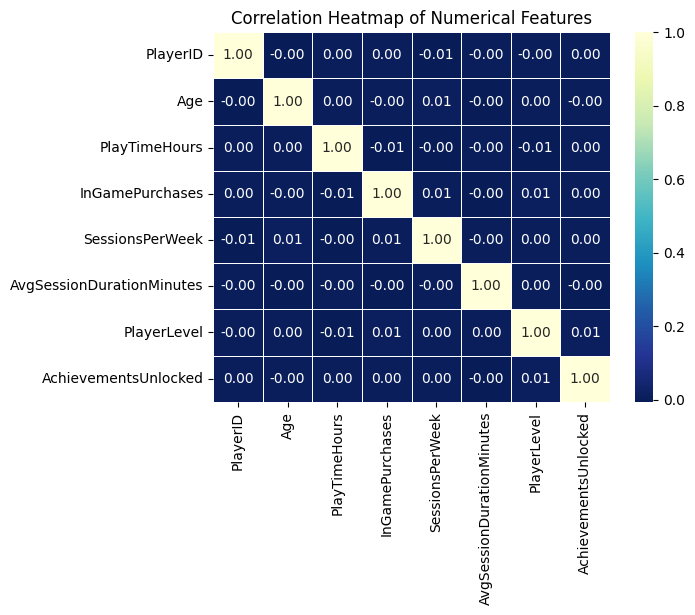

In [22]:
# Correlation heatmap
numerical_columns = df.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numerical_columns.corr()

sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu_r", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

### 🔍 Takeaways from Heatmap

1. **Minimal Correlation**  
   - Most features show little direct correlation—suggesting no single metric drives player behavior.

2. **Notable Signals**  
   - Slight links between `PlayerLevel`, `SessionsPerWeek`, and `AchievementsUnlocked` hint at their influence on engagement and spending.

3. **Actionable Focus**  
   - Analyze player behavior using combined metrics for better insights.  
   - Target low-frequency or low-achievement players to boost playtime and progression.ogression.

---
<h3 align="center"> Preparing data for model development</h3>

### 🔧 Categorical Feature Encoding

1. **Gender**  
   - Binary Encoding: `Male = 1`, `Female = 0`

2. **Location**  
   - One-Hot Encoding: Creates columns like `Location_Europe`, `Location_Other`, `Location_USA`

3. **Game Genre**  
   - One-Hot Encoding: Generates columns such as `Genre_Action`, `Genre_RPG`, `Genre_Simulation`

4. **Game Difficulty**  
   - Ordinal Encoding: `Easy = 1`, `Medium = 2`, `Hard = 3`

5. **Engagement Level**  
   - Ordinal Encoding: `Low = 1`, `Medium = 2`, `High = 3`2`, `High = 3`.

In [23]:
def transform_categorical_columns(dataframe):

    df_copy = dataframe.copy()  # Prevent modifying original df
    
    # Convert Gender to binary values: Male → 1, Female → 0
    df_copy['Gender'] = df_copy['Gender'].map({'Male': 1, 'Female': 0})
    
    # Apply one-hot encoding to the Location column (drop first category to avoid multicollinearity)
    df_copy = pd.get_dummies(df_copy, columns=['Location'], drop_first=True, prefix='Loc')
    
    # Apply one-hot encoding to the GameGenre column
    df_copy = pd.get_dummies(df_copy, columns=['GameGenre'], drop_first=True, prefix='Genre')
    
    # Map GameDifficulty to ordinal scale: Easy → 1, Medium → 2, Hard → 3
    difficulty_scale = {'Easy': 1, 'Medium': 2, 'Hard': 3}
    df_copy['GameDifficulty'] = df_copy['GameDifficulty'].map(difficulty_scale)
    
    # Map EngagementLevel to ordinal scale: Low → 1, Medium → 2, High → 3
    engagement_scale = {'Low': 1, 'Medium': 2, 'High': 3}
    df_copy['EngagementLevel'] = df_copy['EngagementLevel'].map(engagement_scale)
    
    return df_copy

# Transform the original dataset
processed_df = transform_categorical_columns(df)

# Preview the transformed dataset
processed_df

,PlayerID,Age,Gender,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel,Loc_Europe,Loc_Other,Loc_USA,Genre_RPG,Genre_Simulation,Genre_Sports,Genre_Strategy
0,9000,43,1,16.271119,0,2,6,108,79,25,2,False,True,False,False,False,False,True
1,9001,29,0,5.525961,0,2,5,144,11,10,2,False,False,True,False,False,False,True
2,9002,22,0,8.223755,0,1,16,142,35,41,3,False,False,True,False,False,True,False
3,9003,35,1,5.265351,1,1,9,85,57,47,2,False,False,True,False,False,False,False
4,9004,33,1,15.531945,0,2,2,131,95,37,2,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40029,49029,32,1,20.619662,0,1,4,75,85,14,2,False,False,True,False,False,False,True
40030,49030,44,0,13.539280,0,3,19,114,71,27,3,False,True,False,False,True,False,False
40031,49031,15,0,0.240057,1,1,10,176,29,1,3,False,False,True,True,False,False,False
40032,49032,34,1,14.017818,1,2,3,128,70,10,2,False,False,True,False,False,True,False


In [24]:
# Columns name of encoded features
encoded_columns = ['Gender', 'GameDifficulty', 'EngagementLevel', 
                   'Loc_Europe', 'Loc_Other', 'Loc_USA', 
                   'Genre_RPG', 'Genre_Simulation', 'Genre_Sports', 'Genre_Strategy']

unique_values = {feature_column: processed_df[feature_column].unique() for feature_column in encoded_columns}

# Unique values for each encoded feature
unique_values

{'Gender': array([1, 0]),
 'GameDifficulty': array([2, 1, 3]),
 'EngagementLevel': array([2, 3, 1]),
 'Loc_Europe': array([False,  True]),
 'Loc_Other': array([ True, False]),
 'Loc_USA': array([False,  True]),
 'Genre_RPG': array([False,  True]),
 'Genre_Simulation': array([False,  True]),
 'Genre_Sports': array([False,  True]),
 'Genre_Strategy': array([ True, False])}

In [25]:
# Compute feature correlations with EngagementLevel
engagement_correlations = processed_df.corr()['EngagementLevel'].sort_values(ascending=False)

# Convert the correlation series to a DataFrame
correlation_df = engagement_correlations.to_frame(name='CorrelationWithEngagement').reset_index()

# Rename columns for better readability
correlation_df.rename(columns={'index': 'Feature'}, inplace=True)

# Show the resulting correlation table
display(correlation_df)

,Feature,CorrelationWithEngagement
0,EngagementLevel,1.000000
1,SessionsPerWeek,0.605996
2,AvgSessionDurationMinutes,0.476698
3,AchievementsUnlocked,0.060576
4,PlayerLevel,0.059315
5,InGamePurchases,0.008209
6,Genre_Strategy,0.007700
7,GameDifficulty,0.005057
8,Loc_USA,0.002499
9,Genre_Simulation,0.001184


### 📊 Correlation Highlights: `EngagementLevel`

1. **High Correlation**
   - **SessionsPerWeek** (0.61): Strongest driver of engagement.  
     _→ More weekly sessions = higher engagement._

2. **Moderate Correlation**
   - **AvgSessionDurationMinutes** (0.48):  
     _→ Longer play sessions help boost engagement._

3. **Weak but Positive**
   - **AchievementsUnlocked** (0.06) & **PlayerLevel** (0.06):  
     _→ Progress and achievements slightly reflect engagement._

4. **Minimal to No Impact**
   - Features like `GameDifficulty`, `InGamePurchases`, `Age`, and `Location` show negligible correlation.  
     → These don’t directly influence engagement level._nfluence engagement.


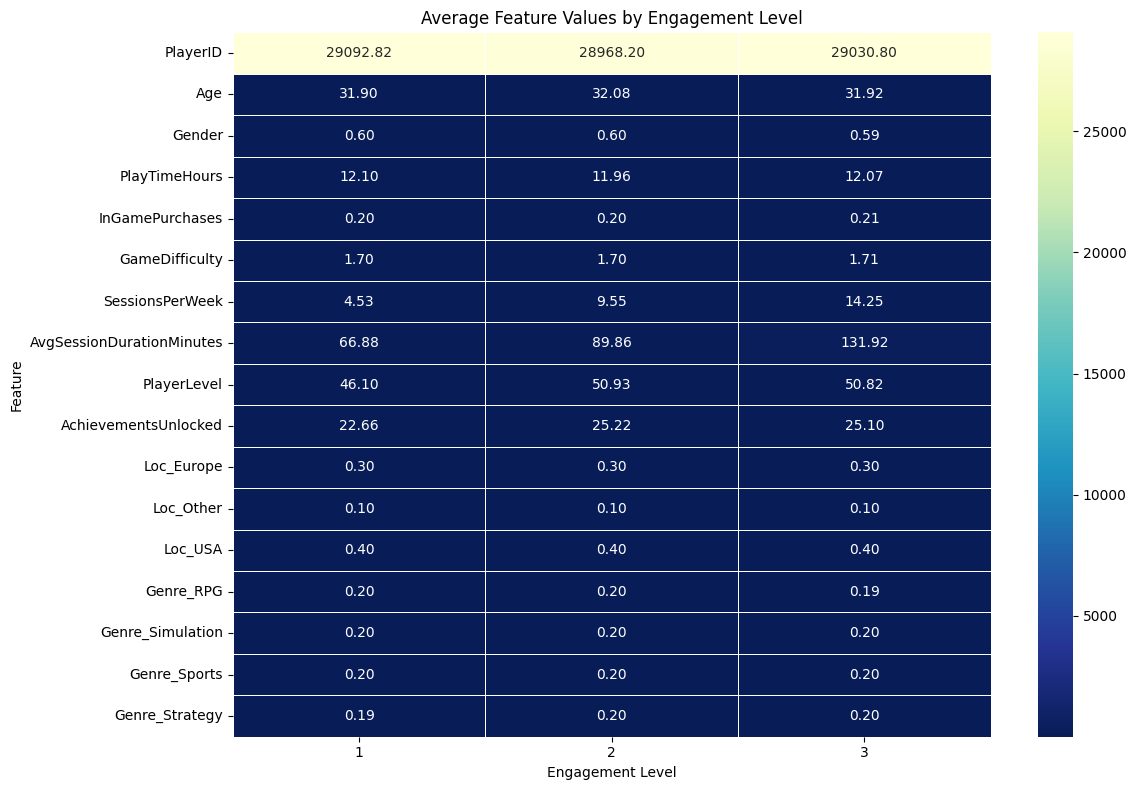

In [26]:
# Calculate average values of each feature grouped by engagement level
feature_means_by_engagement = processed_df.groupby('EngagementLevel').mean().T

# Visualize how feature values vary across engagement levels
plt.figure(figsize=(12, 8))
sns.heatmap(
    feature_means_by_engagement,
    annot=True,
    cmap='YlGnBu_r',
    fmt='.2f',
    linewidths=0.5,
    cbar_kws={"shrink": 1}
)
plt.title('Average Feature Values by Engagement Level')
plt.ylabel('Feature')
plt.xlabel('Engagement Level')
plt.tight_layout()
plt.show()


### 📌 Key Insights from Average Feature Values by Engagement Level

1. **Session Behavior**
   - Players with higher engagement log **more frequent** (14.25/week) and **longer sessions** (~132 mins), compared to ~4.5 sessions and ~67 mins for low engagement.

2. **Player Progress**
   - High engagement users show higher **levels (50.8+)** and **more achievements unlocked (25+)** than low-engagement players.

3. **Purchase Trends**
   - In-game purchase behavior slightly increases with engagement: 21% for high vs. 20% for low.

4. **Genre & Difficulty**
   - Genre and difficulty preferences remain stable across levels, but slight shifts may still exist (e.g., Strategy genre dips slightly at high engagement).

5. **Demographics**
   - Gender and location proportions remain mostly constant across engagement levels.

---

### ✅ Strategic Recommendations

1. **Increase Session Frequency**
   - Introduce daily login rewards or short timed challenges to encourage consistent play.

2. **Enhance Progression Systems**
   - Offer progression-based incentives like XP boosts, badges, or unlockable content.

3. **Retain High-Value Users**
   - Develop more advanced challenges for highly engaged players to sustain long sessions.

4. **Boost Monetization**
   - Use engagement-based offers or bundles to convert medium-level users into spenders.

5. **Localized Campaigns**
   - While location doesn’t vary much, tailor content and offers for the USA and top regional markets.
 for Europe and Asia.

---
<h3 align="center">Split into train and test</h3>

In [27]:
# Copy and Remove PlayerID since it's not useful for prediction
player_ids = processed_df['PlayerID'].copy()
processed_df = processed_df.drop(columns=['PlayerID'])

# Separate input features and target variable
X = processed_df.drop(columns=['EngagementLevel'])  # Independent variables
y = processed_df['EngagementLevel']  # Target: engagement level classification

In [28]:
# Split the dataset into training and testing sets (80% train, 20% test), preserving class distribution
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Check the dimensions of each split
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (32027, 16)
X_test shape: (8007, 16)
y_train shape: (32027,)
y_test shape: (8007,)


In [29]:
# Standardize the feature values using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit on training data and transform
X_test_scaled = scaler.transform(X_test)        # Apply same transformation to test data

### Model Training and Evaluation

In [30]:
# Initialize Models
models = {
    "Random Forest": RandomForestClassifier(random_state=42, class_weight='balanced'),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "LightGBM": LGBMClassifier(verbose=-1, random_state=42, class_weight='balanced'),
    "CatBoost": CatBoostClassifier(verbose=0, random_state=42),
    "Logistic Regression": LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, class_weight='balanced', random_state=42),
    "SVC": SVC(kernel='rbf', probability=True, class_weight='balanced', random_state=42)
}

# Confirm initialized models
print("Models initialized:", list(models.keys()))

Models initialized: ['Random Forest', 'Gradient Boosting', 'LightGBM', 'CatBoost', 'Logistic Regression', 'SVC']


Evaluating model: Random Forest

Classification Report: Random Forest
              precision    recall  f1-score   support

           1       0.92      0.88      0.90      2065
           2       0.91      0.95      0.93      3875
           3       0.93      0.88      0.90      2067

    accuracy                           0.91      8007
   macro avg       0.92      0.90      0.91      8007
weighted avg       0.92      0.91      0.91      8007



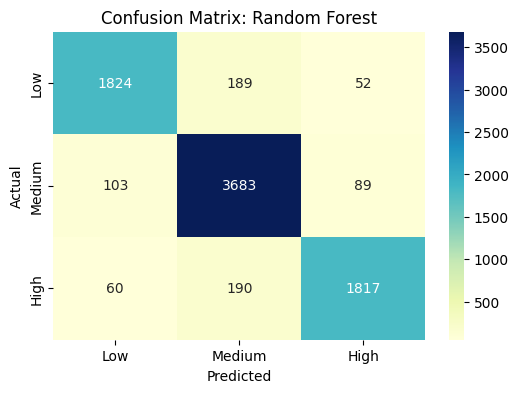

Evaluating model: Gradient Boosting

Classification Report: Gradient Boosting
              precision    recall  f1-score   support

           1       0.91      0.86      0.89      2065
           2       0.90      0.95      0.92      3875
           3       0.92      0.88      0.90      2067

    accuracy                           0.91      8007
   macro avg       0.91      0.90      0.90      8007
weighted avg       0.91      0.91      0.91      8007



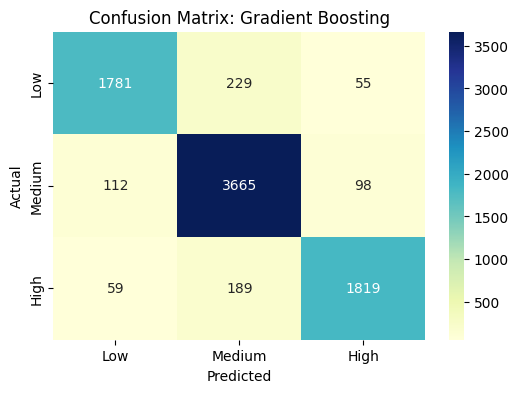

Evaluating model: LightGBM

Classification Report: LightGBM
              precision    recall  f1-score   support

           1       0.89      0.90      0.90      2065
           2       0.92      0.93      0.93      3875
           3       0.92      0.89      0.91      2067

    accuracy                           0.91      8007
   macro avg       0.91      0.91      0.91      8007
weighted avg       0.91      0.91      0.91      8007



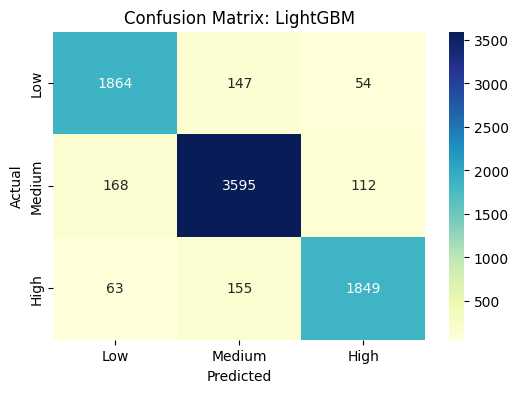

Evaluating model: CatBoost

Classification Report: CatBoost
              precision    recall  f1-score   support

           1       0.92      0.89      0.91      2065
           2       0.92      0.95      0.93      3875
           3       0.93      0.89      0.91      2067

    accuracy                           0.92      8007
   macro avg       0.92      0.91      0.92      8007
weighted avg       0.92      0.92      0.92      8007



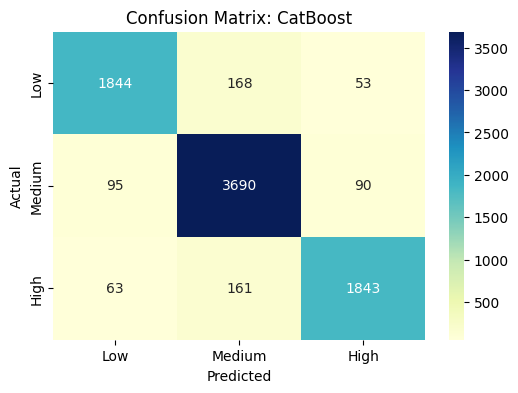

Evaluating model: Logistic Regression

Classification Report: Logistic Regression
              precision    recall  f1-score   support

           1       0.69      0.81      0.74      2065
           2       0.87      0.72      0.79      3875
           3       0.80      0.91      0.85      2067

    accuracy                           0.79      8007
   macro avg       0.78      0.81      0.79      8007
weighted avg       0.80      0.79      0.79      8007



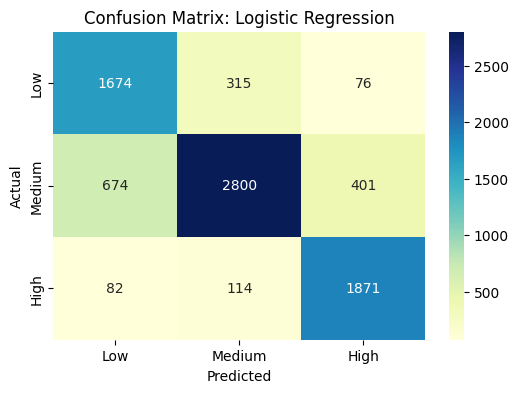

Evaluating model: SVC

Classification Report: SVC
              precision    recall  f1-score   support

           1       0.82      0.89      0.85      2065
           2       0.92      0.86      0.88      3875
           3       0.87      0.90      0.88      2067

    accuracy                           0.88      8007
   macro avg       0.87      0.88      0.87      8007
weighted avg       0.88      0.88      0.88      8007



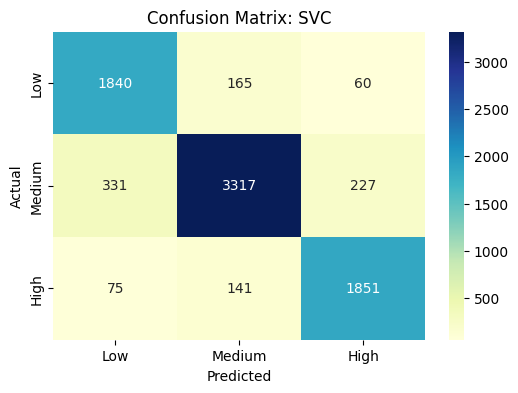


Model Evaluation Summary:


,Model,Accuracy,AUC
0,CatBoost,0.921319,0.946353
1,Random Forest,0.914700,0.944671
2,LightGBM,0.912701,0.946413
3,Gradient Boosting,0.907331,0.945354
4,SVC,0.875234,0.943830
5,Logistic Regression,0.792432,0.916146


In [31]:
# Initialize a list to collect model evaluation results
evaluation_summary = []

# Loop through each model for training and evaluation
for name, clf in models.items():
    print(f"Evaluating model: {name}")
    
    # Train the model on the scaled training data
    clf.fit(X_train_scaled, y_train)
    
    # Generate predictions
    y_pred = clf.predict(X_test_scaled)
    y_proba = clf.predict_proba(X_test_scaled) if hasattr(clf, "predict_proba") else None

    # Compute performance metrics
    acc = accuracy_score(y_test, y_pred)
    auc_score = roc_auc_score(y_test, y_proba, multi_class='ovr') if y_proba is not None else "N/A"
    
    # Save results
    evaluation_summary.append({
        "Model": name,
        "Accuracy": acc,
        "AUC": auc_score
    })

    # Display classification report
    print(f"\nClassification Report: {name}")
    print(classification_report(y_test, y_pred))

    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, cmap="YlGnBu", fmt='d',
                xticklabels=['Low', 'Medium', 'High'],
                yticklabels=['Low', 'Medium', 'High'])
    plt.title(f"Confusion Matrix: {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Summarize and display all model performances
results_df = pd.DataFrame(evaluation_summary).sort_values(by="Accuracy", ascending=False).reset_index(drop=True)
print("\nModel Evaluation Summary:")
display(results_df)

### ✅ Summary of Model Evaluation

#### 1. 📈 Overall Performance

- **CatBoost** had the highest accuracy and tied for best AUC, showing top-tier performance.
- **LightGBM** delivered the best AUC and closely matched CatBoost in accuracy.
- **Logistic Regression** lagged behind, especially in recall and F1-score for classifying `Medium` engagement.

---

#### 2. 🔍 Confusion Matrix Highlights

- Most models excelled at predicting the **`Medium`** class, with strong true positive rates.
- **CatBoost and Random Forest** had the most balanced performance across all three classes.
- **Logistic Regression** showed high misclassification, especially for `Medium` engagement users.

---

#### 3. 📊 Classification Report Summary

- All ensemble models (CatBoost, LightGBM, Random Forest, Gradient Boosting) exhibited:
  - **High precision and recall across all classes**
  - **Macro and weighted F1-scores above 0.90**
- **SVC** performed reasonably well but slightly trailed the ensemble models.
- **Logistic Regression** had limited performance, particularly underpredicting `Medium` engagement.

---

#### 🎯 Model Recommendation

- For production deployment, **CatBoost** or **LightGBM** are strong choices due to their high accuracy and AUC.
- Consider **Random Forest** for interpretability or feature importance visualization.
- Avoid relying solely on **Logistic Regression** for this task due to underperformance.s all metrics.

🔝 Best performing model: LightGBM



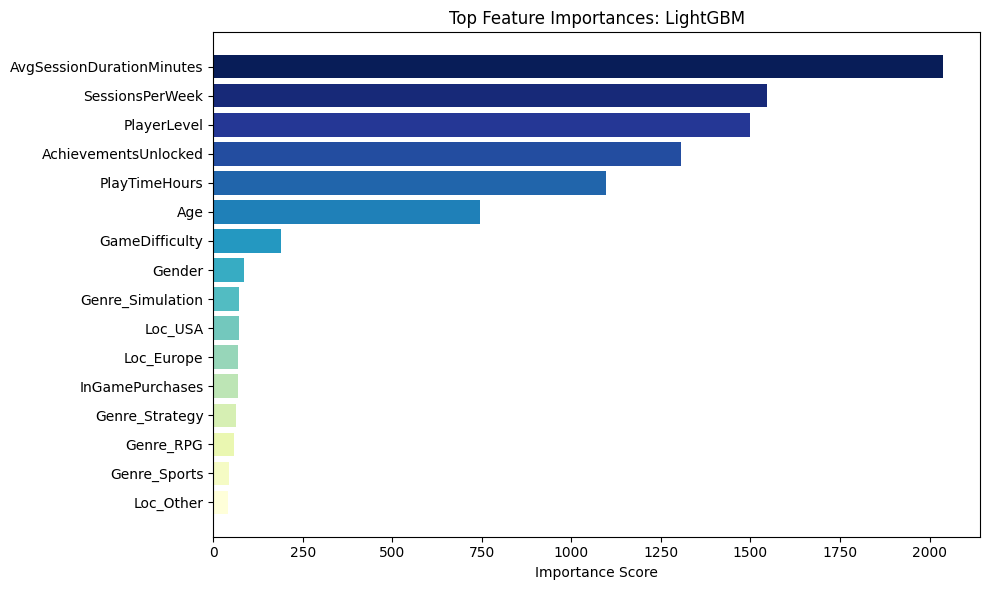

In [32]:
# 🔍 Select the top-performing model based on highest AUC (LightGBM)
top_model_name = results_df.loc[results_df['AUC'].idxmax(), "Model"]
print(f"🔝 Best performing model: {top_model_name}\n")

# Retrieve and retrain the best model
top_model = models[top_model_name]
top_model.fit(X_train_scaled, y_train)

# 🎯 Plot feature importances (if supported by the model)
if hasattr(top_model, "feature_importances_"):
    importances = top_model.feature_importances_
    features = X.columns
    sorted_indices = importances.argsort()[::-1]
    
    # Create a horizontal bar chart of feature importances
    plt.figure(figsize=(10, 6))
    colors = plt.cm.YlGnBu_r(np.linspace(0, 1, len(importances)))
    plt.barh(range(len(sorted_indices)), importances[sorted_indices], color=colors, align='center')
    plt.yticks(range(len(sorted_indices)), [features[i] for i in sorted_indices])
    plt.xlabel("Importance Score")
    plt.title(f"Top Feature Importances: {top_model_name}")
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()

else:
    print(f"⚠️ {top_model_name} does not provide built-in feature importances.")

### 🔍 Insights from Feature Importance (LightGBM)

1. **Key Drivers of Engagement:**
   - **`AvgSessionDurationMinutes`** is the most influential feature — players spending more time per session are highly engaged.
   - **`SessionsPerWeek`** and **`PlayerLevel`** also rank high, emphasizing the role of frequent play and player progression.
   - **`AchievementsUnlocked`** reflects moderate influence, showing that unlocking goals supports engagement.

2. **Supporting Factors:**
   - **`PlayTimeHours`** and **`Age`** contribute meaningfully, suggesting that both total playtime and player demographics play a role.
   - **`GameDifficulty`** has a minor influence, possibly indicating interest in balanced or challenging gameplay.

3. **Minimal Contributors:**
   - **`Genre`** and **`Location`**-based features, along with **`InGamePurchases`**, have low importance, suggesting these don't heavily affect engagement predictions.

🧠 **Implication**: Engagement is driven more by behavior (how often and how long players play) than static attributes like geography or game genre.s of engagement.

---
<h3 align="center">Explaining Model - LightGBM</h3>

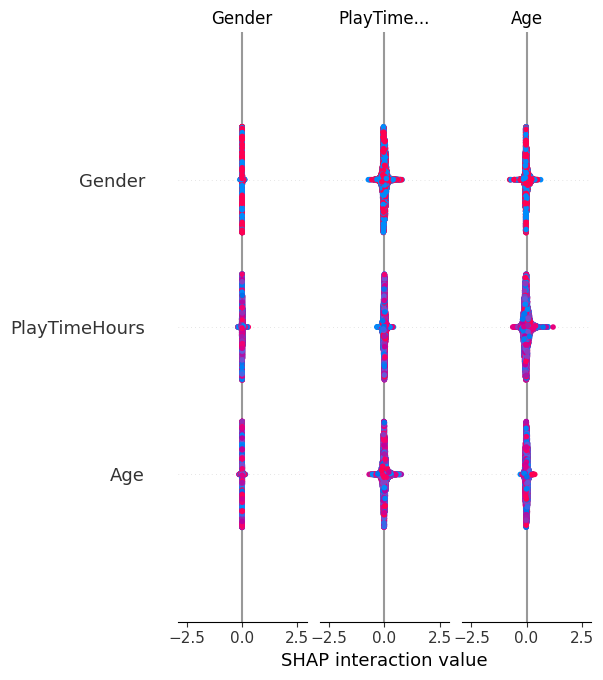

In [33]:
# Initialize TreeExplainer with the trained model
explainer = shap.TreeExplainer(top_model)

# Get SHAP values for the test set
shap_values = explainer.shap_values(X_test_scaled)

# Plot summary of SHAP values
shap.summary_plot(shap_values, X_test_scaled, feature_names=X.columns)

### 🔍 SHAP Interaction Plot Insights

This SHAP interaction plot visualizes how pairs of features (`Gender`, `PlayTimeHours`, and `Age`) interact to influence the model’s predictions.

#### 🧠 What It Shows:
- **Diagonal cells** (e.g., `Gender × Gender`) represent how much each feature contributes to the model **on its own** (main effect).
- **Off-diagonal cells** (e.g., `Gender × PlayTimeHours`) capture **interaction effects**, showing how the combination of two features jointly influences the prediction.

#### 📌 Key Observations:
- The **SHAP interaction values are mostly centered around 0**, indicating **weak or minimal interactions** between these features.
- No strong positive or negative interactions are observed, meaning these features primarily act **independently** rather than influencing predictions through complex interdependencies.

#### ✅ Interpretation:
- This supports the idea that the model's behavior is **largely additive** for these features.
- There's **no immediate need for feature crosses or interaction terms** involving `Gender`, `PlayTimeHours`, or `Age`, as their combined effect is not significantly stronger than their individual effects.

#### 💡 Takeaway:
> Focus on single-feature explanations and importance scores for model interpretation. Interactions among these specific features do not appear to significantly enhance model performance or interpretability.

In [34]:
# Initialize LIME explainer
lime_explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train_scaled,
    feature_names=X.columns.tolist(),
    class_names=['Low', 'Medium', 'High'],
    mode='classification'
)

# Instance from test data to explain
i = 5
lime_exp = lime_explainer.explain_instance(
    X_test_scaled[i],
    top_model.predict_proba,
    num_features=10
)

lime_exp.save_to_file('lime_explanation.html')

# Get the index of the test instance in the original DataFrame
original_index = y_test.index[i]

# Retrieve and print the corresponding PlayerID
player_id = player_ids.loc[original_index]
print(f"Explaining prediction for PlayerID: {player_id}")

from IPython.display import IFrame
IFrame('lime_explanation.html', width=1000, height=600)

Explaining prediction for PlayerID: 43281


### 🔍 LIME Explanation: Why PlayerID: 43281 Was Classified as "Medium Engagement" ??

#### 🎯 **Prediction Overview:**
- **Predicted Engagement Level:** **Medium**
- **Prediction Probabilities:**  
  - Low: **31%**  
  - **Medium: 61%** ✅  
  - High: **8%**

---

#### 📊 **Key Feature Influences:**

| Feature                       | Contribution | Impact Direction     |
|------------------------------|--------------|-----------------------|
| **SessionsPerWeek** (-0.95)  | -0.27        | 🔵 Negative influence (pushed away from Medium)  
| **AvgSessionDurationMinutes** (-0.30) | +0.22        | 🟠 Positive influence (pushed toward Medium)  
| **PlayerLevel** (+1.45)      | +0.04        | 🟠 Positive  
| **Loc_USA** (-0.82)          | +0.03        | 🟠 Positive  
| **Loc_Other** (-0.33)        | +0.02        | 🟠 Positive  
| **Genre_RPG** (-0.50)        | +0.02        | 🟠 Positive  
| **Genre_Strategy** (-0.50)   | +0.01        | 🟠 Positive  
| **Gender** (0.82)            | +0.01        | 🟠 Positive  
| **AchievementsUnlocked** (-0.45) | -0.01       | 🔵 Negative  
| **Genre_Simulation** (-0.50) | -0.01        | 🔵 Negative  

---

### ✅ Interpretation:

- **Biggest factor reducing engagement score:**  
  - Low value for `SessionsPerWeek` had the highest **negative impact** on predicting "Medium" engagement.
  
- **Strongest positive drivers:**  
  - Longer session durations (`AvgSessionDurationMinutes`) and player progression (`PlayerLevel`) helped classify this player as Medium.

---

### 💡 Recommendations:

1. **Boost Session Frequency**  
   - Introduce **daily login rewards** or **time-limited events** to motivate this player to log in more frequently.

2. **Reinforce Progression**  
   - Since player level is high, use **level-based incentives** to transition them to **High Engagement**.

3. **Leverage Regional & Genre Data**  
   - Since features like `Loc_USA` and `Genre_RPG` had subtle effects, tailor **genre-specific content** or **regional campaigns** for better engagement uplift.